In [1]:
import datetime

import pandas as pd
import numpy as np

from covid_tracking_data.collector import *
from covid_analysis.utility import *

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
sns.set()

In [2]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

In [3]:
df, states_in_order = get_dataset()

        date state  positive  negative  pending  hospitalized  death  total  \
0 2020-03-04    NY       6.0      48.0     24.0           NaN    NaN     78   
1 2020-03-05    NY      22.0      76.0     24.0           NaN    NaN    122   
2 2020-03-06    NY      33.0      92.0    236.0           NaN    NaN    361   
3 2020-03-07    NY      76.0      92.0    236.0           NaN    NaN    404   
4 2020-03-08    NY     105.0      92.0      NaN           NaN    NaN    197   

            dateChecked  order        lastUpdateEt  
0  2020-03-04T21:00:00Z      0 2020-03-22 11:00:00  
1  2020-03-05T21:00:00Z      0 2020-03-22 11:00:00  
2  2020-03-06T21:00:00Z      0 2020-03-22 11:00:00  
3  2020-03-07T21:00:00Z      0 2020-03-22 11:00:00  
4  2020-03-08T20:00:00Z      0 2020-03-22 11:00:00  
           positive      negative      pending  hospitalized       death  \
count    868.000000    744.000000   329.000000     11.000000  233.000000   
mean      94.455069    799.580645    73.212766    178.5

/Users/drskippy/Working/2020covid19/covid_analysis/utility.py:14: RuntimeWarning: divide by zero encountered in log
  log_total_by_day = np.log(non_zero_total_by_day)


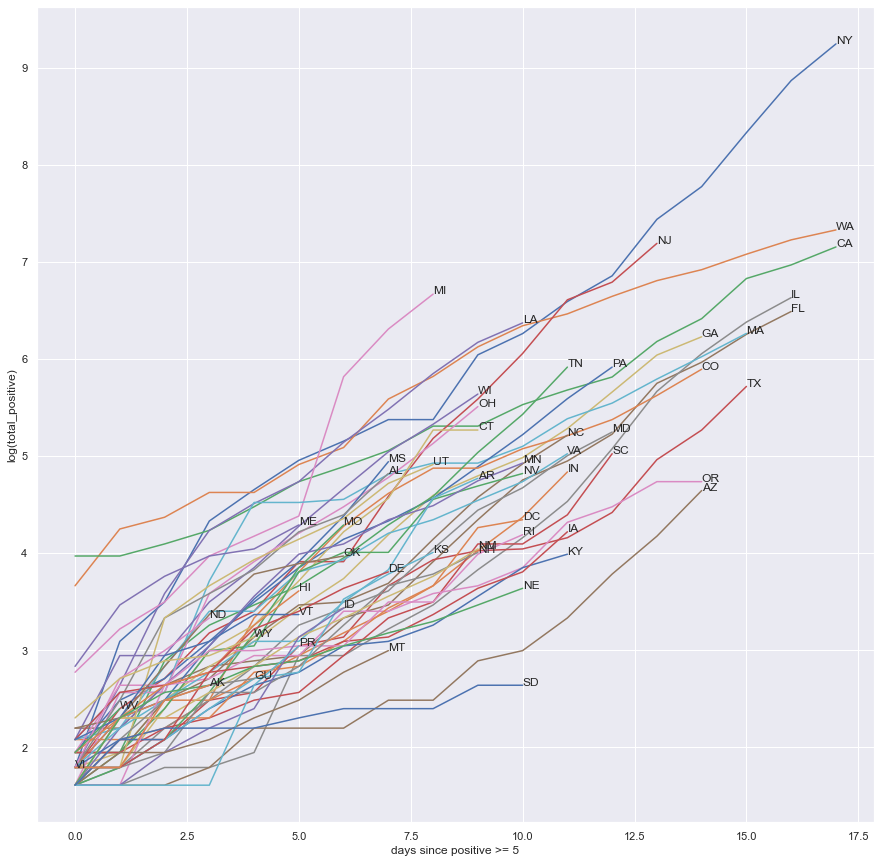

In [4]:
plt.figure(figsize=[15,15])
min_pos=5
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s, zero_aligned=True, min_pos=min_pos)
    plt.plot(dfq["days_since_{}".format(min_pos)].values, dfq.log_positive.values)
    try:
        plt.annotate(s, (dfq["days_since_{}".format(min_pos)].values[-1], dfq.log_positive.values[-1]))
    except IndexError:
        pass
plt.xlabel("days since positive >= {}".format(min_pos))
plt.ylabel("log(total_positive)")
plt.show()

US Total Positive, doubling every 2.31 days
(2020-03-22T13:00)


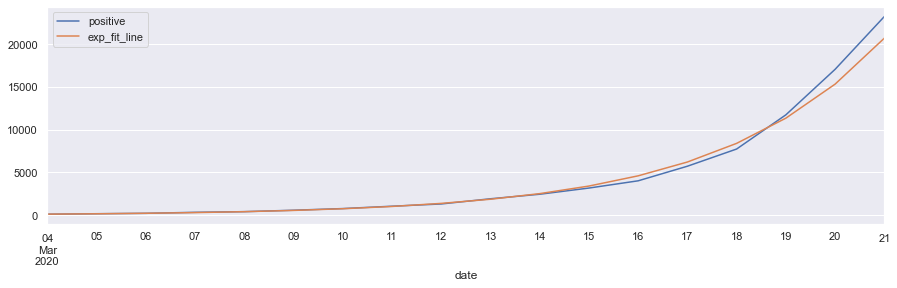

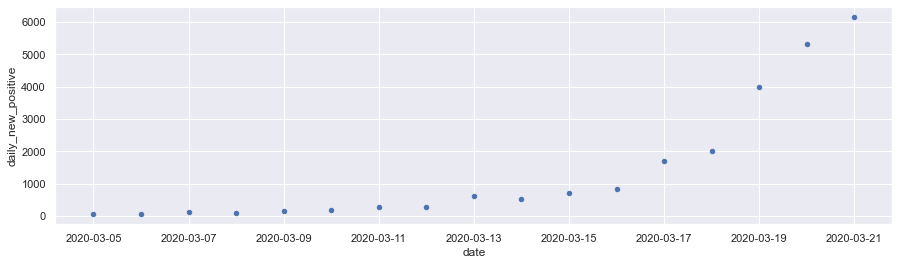

MODEL: US Total Positive, doubling every 2.31 days
(2020-03-22T13:00)


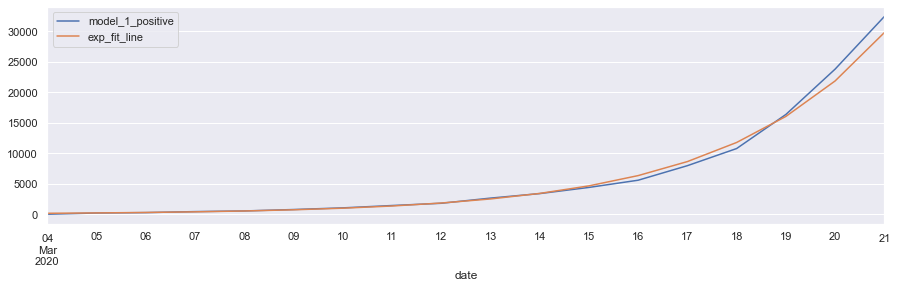

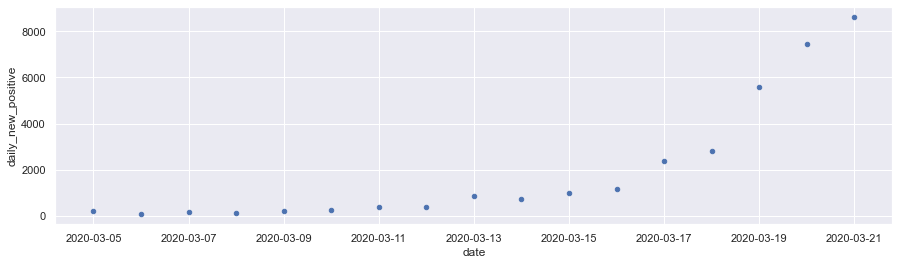

In [5]:
dfa, dt, lud = get_state_doubling_df(df, "*")
lu = str(lud)[:16]
print("US Total Positive, doubling every {:.3} days\n({})".format(dt, lu))
dfa.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
dfa.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
plt.show()
# model
dfm = actual_model_1(dfa, "*")
dfma, dtm, _ = get_state_doubling_df(dfm, "*", pos_key="model_1_positive")
dfma.plot(x="date", y=["model_1_positive", "exp_fit_line"], figsize=[15,4])
lu = str(lud)[:16]
print("MODEL: US Total Positive, doubling every {:.3} days\n({})".format(dt, lu))
dfma.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
plt.show()

state=NY  last_update=2020-03-22T11:00
doubling every 1.85 days
(naive estimates: current_unresolved=10140 hosp=1521 icu=405)


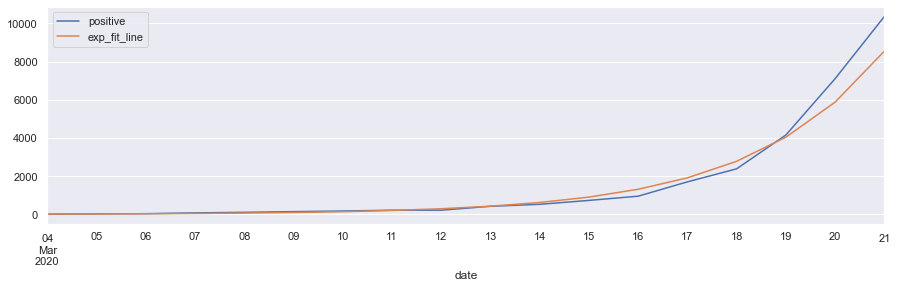

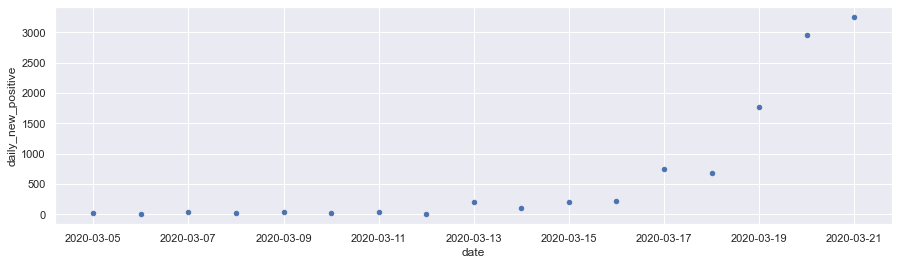

state=WA  last_update=2020-03-21T18:00
doubling every 3.22 days
(naive estimates: current_unresolved=1257 hosp=188 icu=50)


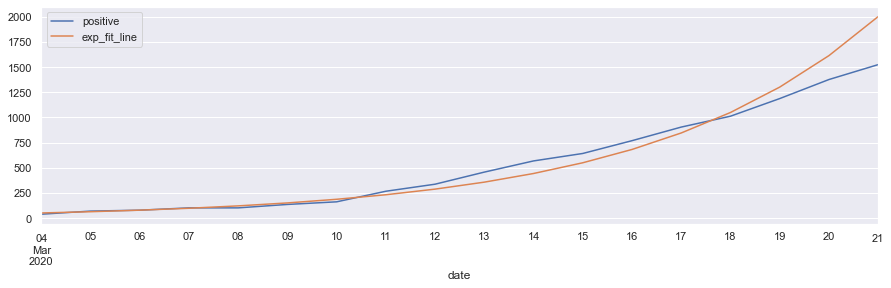

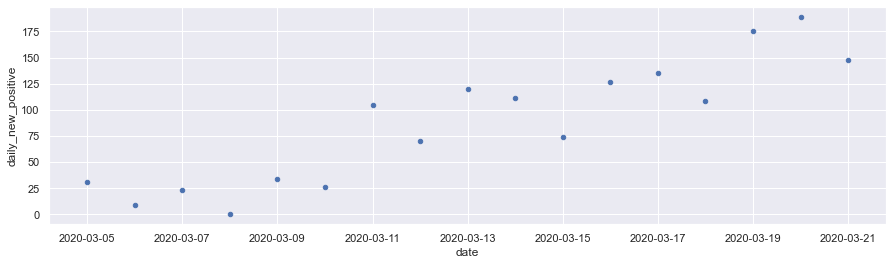

state=CA  last_update=2020-03-22T11:20
doubling every 3.59 days
(naive estimates: current_unresolved=1122 hosp=168 icu=44)


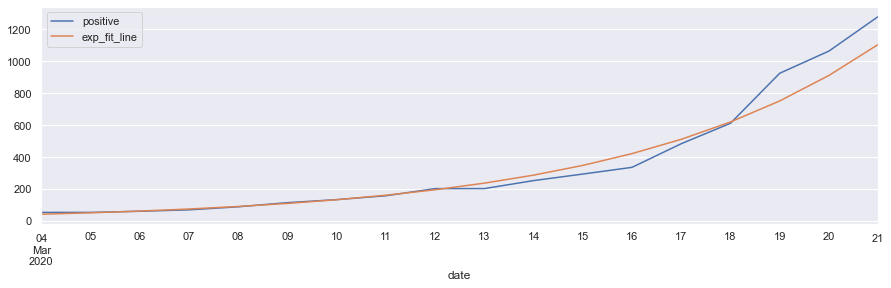

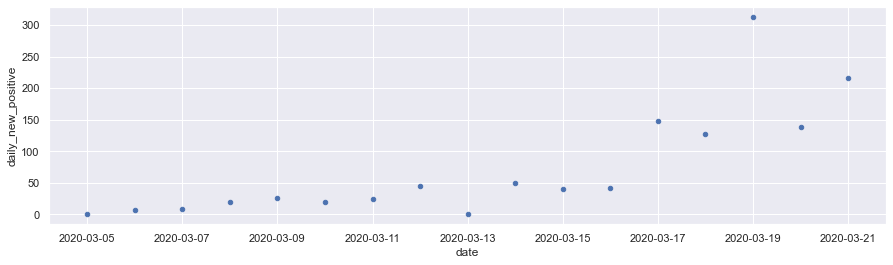

state=NJ  last_update=2020-03-21T13:00
doubling every 1.56 days
(naive estimates: current_unresolved=1303 hosp=195 icu=52)


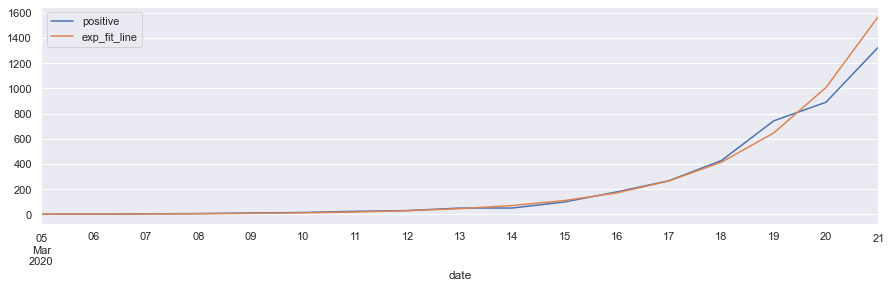

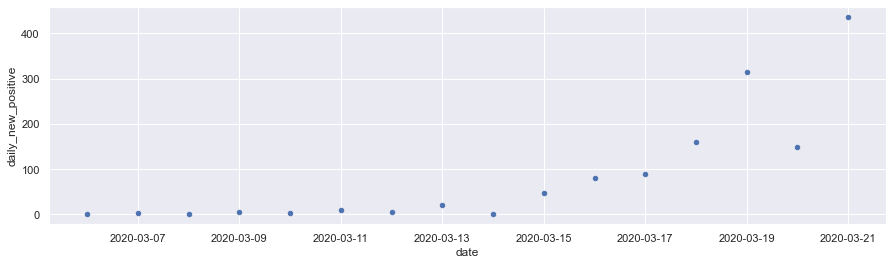

state=LA  last_update=2020-03-22T10:00
doubling every 1.29 days
(naive estimates: current_unresolved=579 hosp=86 icu=23)


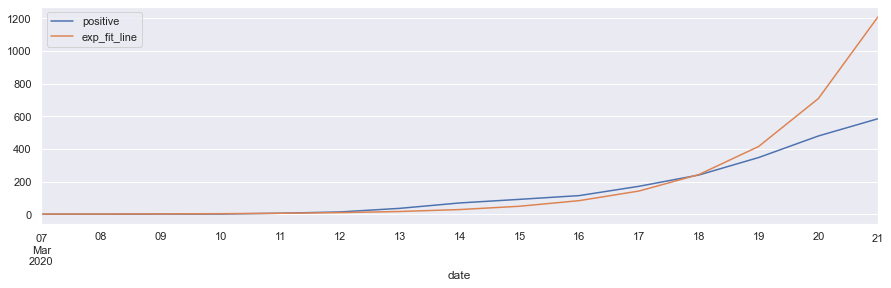

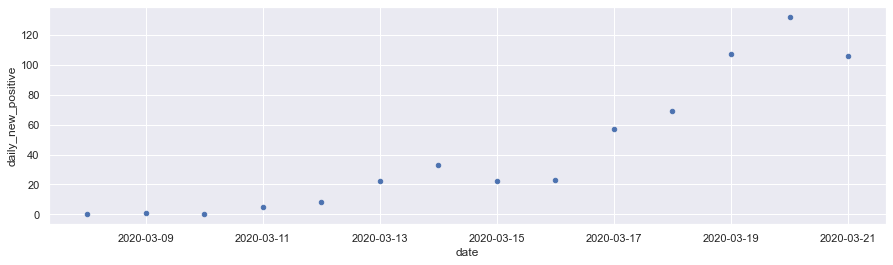

state=FL  last_update=2020-03-22T11:00
doubling every 2.31 days
(naive estimates: current_unresolved=630 hosp=94 icu=25)


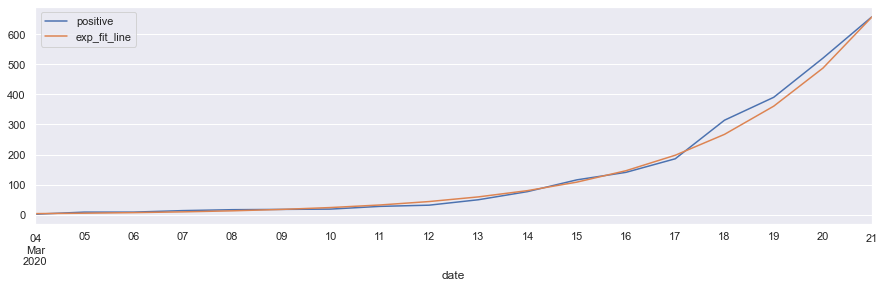

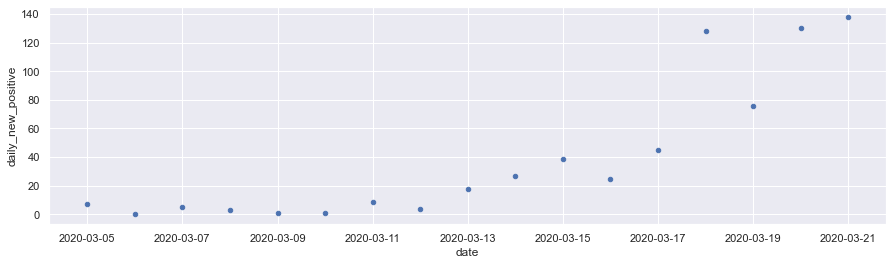

state=MI  last_update=2020-03-21T15:00
doubling every 1.18 days
(naive estimates: current_unresolved=785 hosp=117 icu=31)


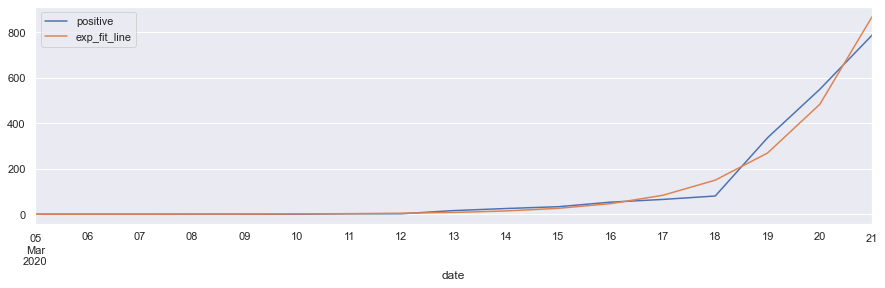

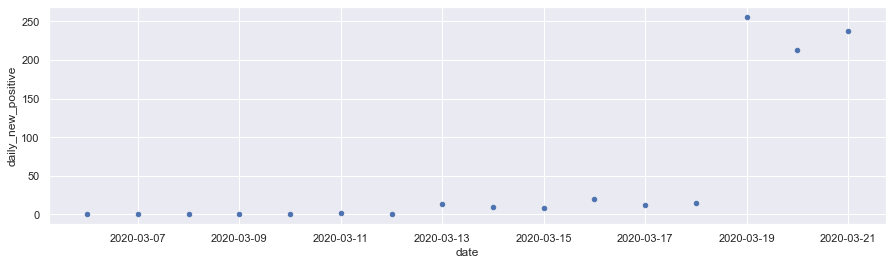

state=IL  last_update=2020-03-21T00:00
doubling every 2.11 days
(naive estimates: current_unresolved=740 hosp=111 icu=29)


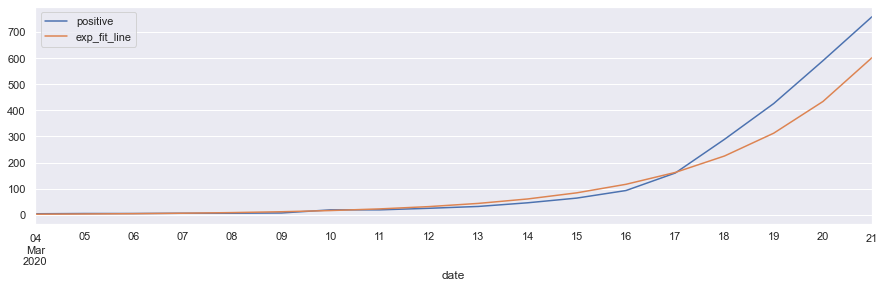

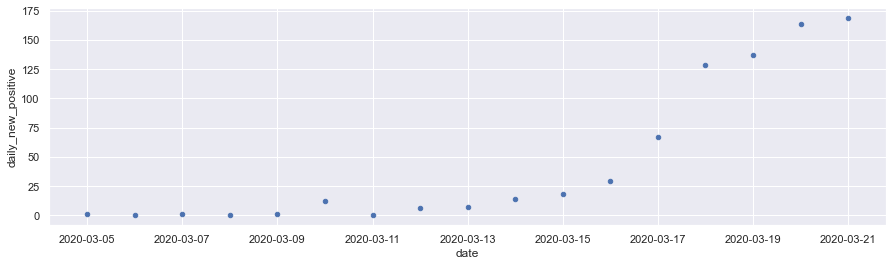

state=GA  last_update=2020-03-22T12:00
doubling every 2.02 days
(naive estimates: current_unresolved=485 hosp=72 icu=19)


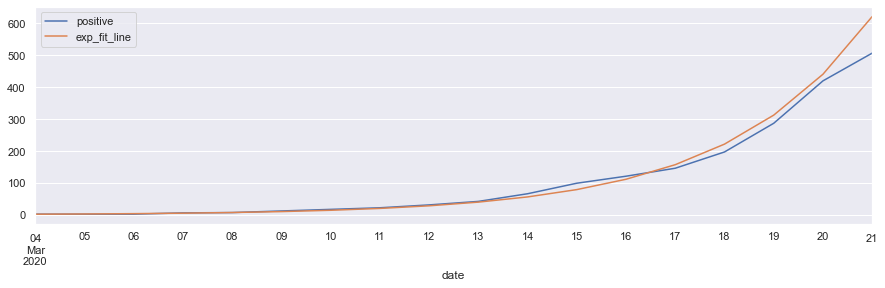

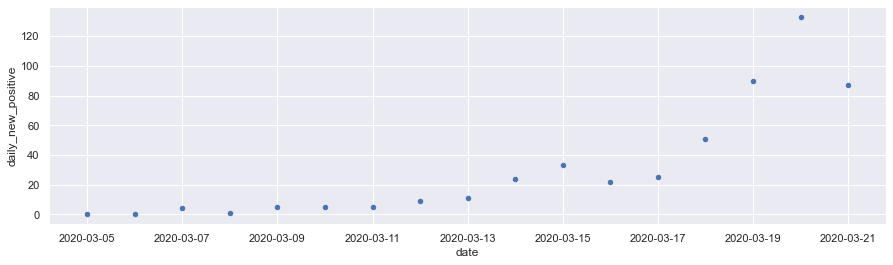

state=MA  last_update=2020-03-21T16:00
doubling every 2.28 days
(naive estimates: current_unresolved=433 hosp=64 icu=17)


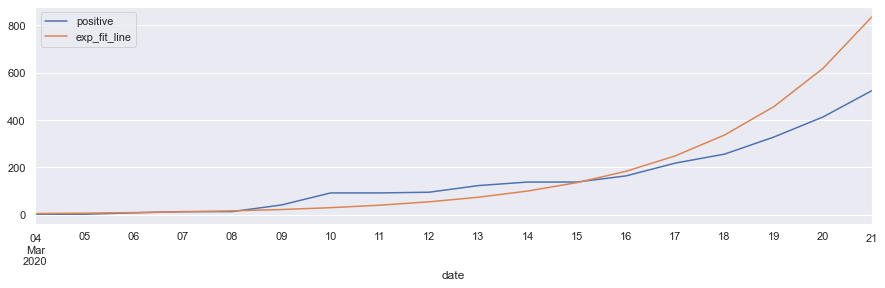

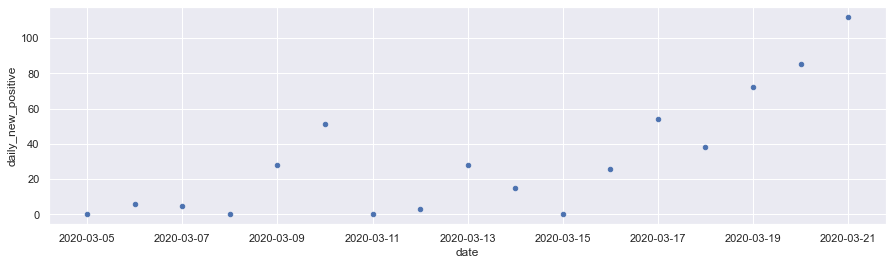

state=PA  last_update=2020-03-22T12:00
doubling every 1.99 days
(naive estimates: current_unresolved=356 hosp=53 icu=14)


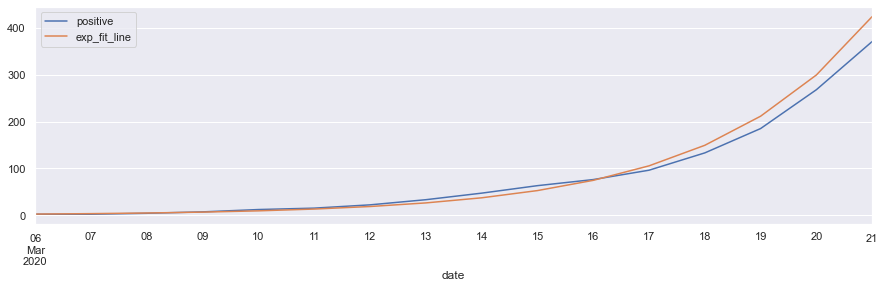

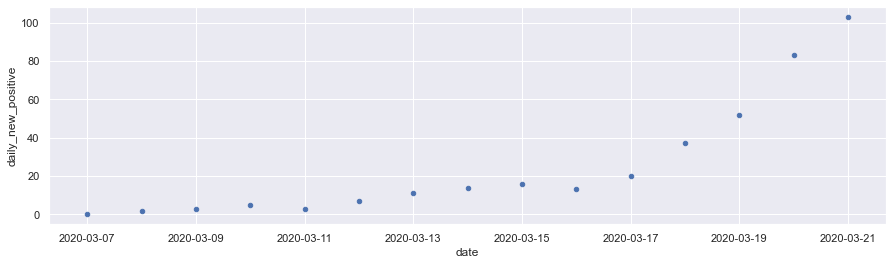

state=CO  last_update=2020-03-21T18:00
doubling every 2.17 days
(naive estimates: current_unresolved=335 hosp=50 icu=13)


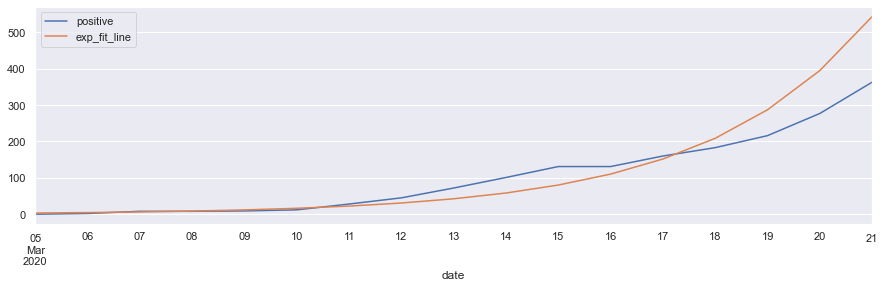

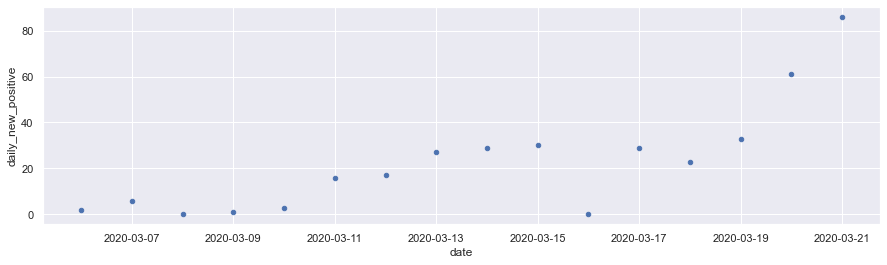

state=TN  last_update=2020-03-20T22:48
doubling every 1.82 days
(naive estimates: current_unresolved=364 hosp=54 icu=14)


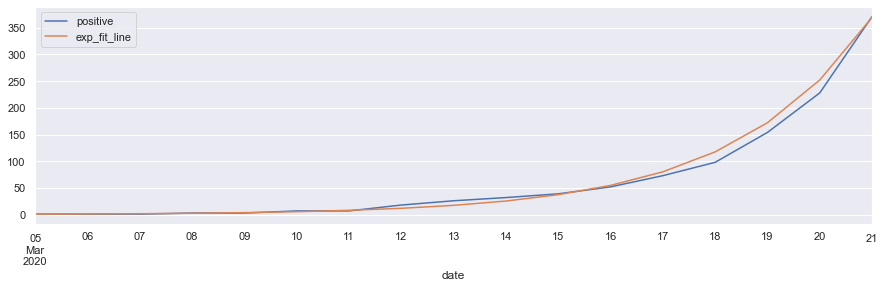

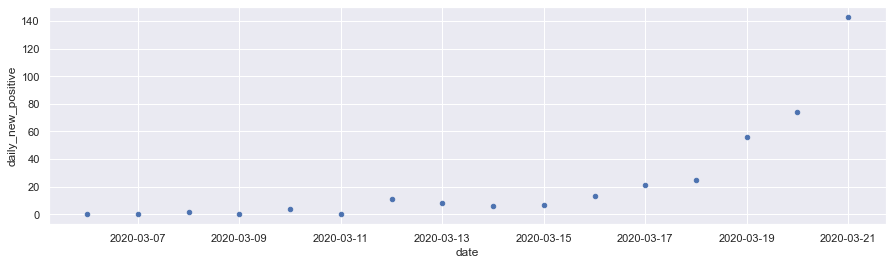

state=TX  last_update=2020-03-22T13:00
doubling every 2.35 days
(naive estimates: current_unresolved=283 hosp=42 icu=11)


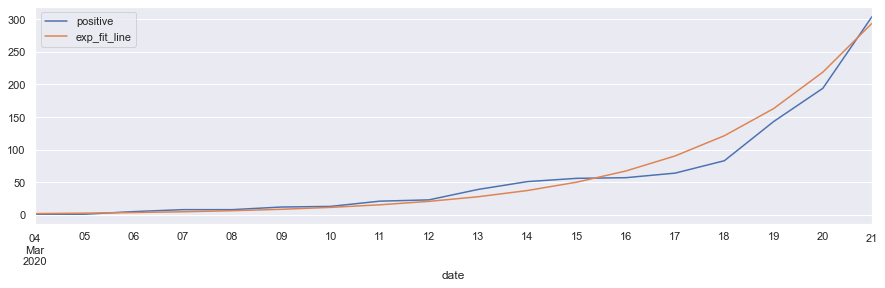

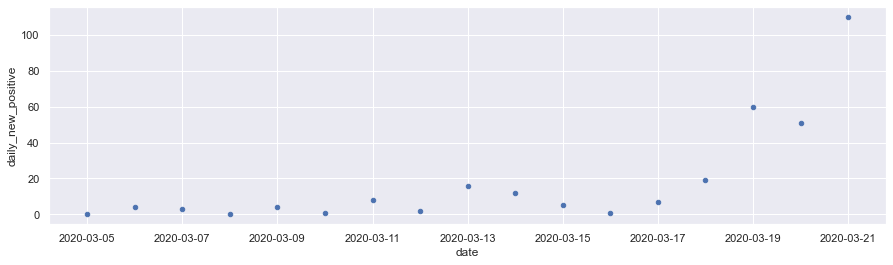

state=WI  last_update=2020-03-21T16:00
doubling every 1.77 days
(naive estimates: current_unresolved=278 hosp=41 icu=11)


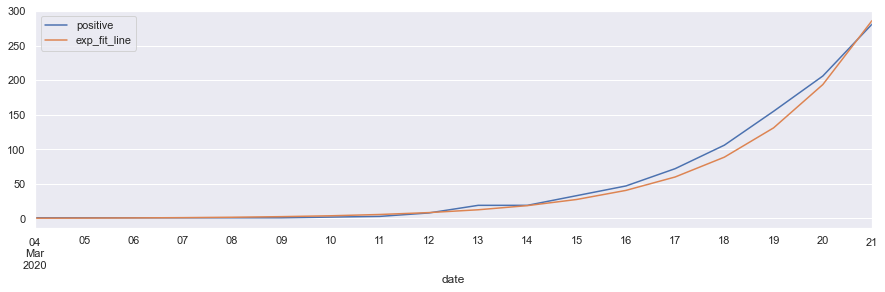

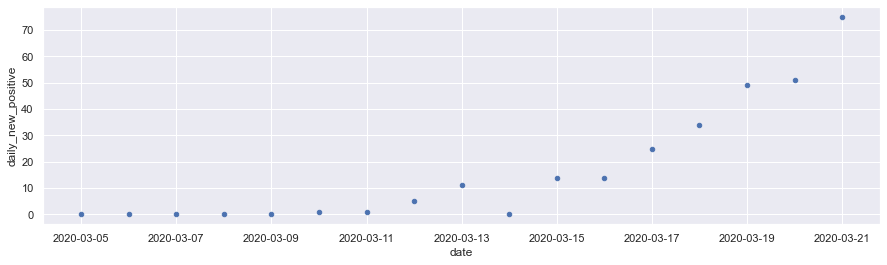

state=NC  last_update=2020-03-22T10:16
doubling every 2.17 days
(naive estimates: current_unresolved=177 hosp=26 icu=7)


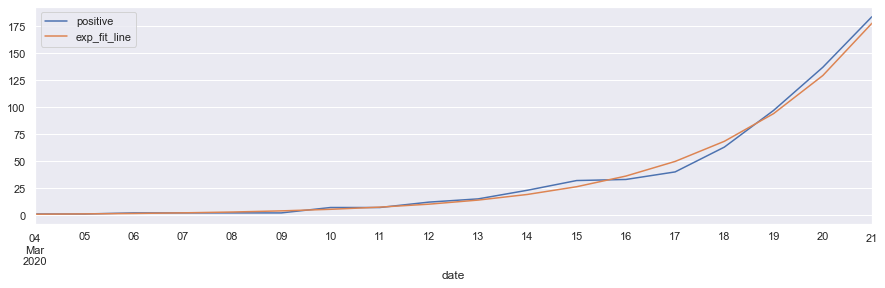

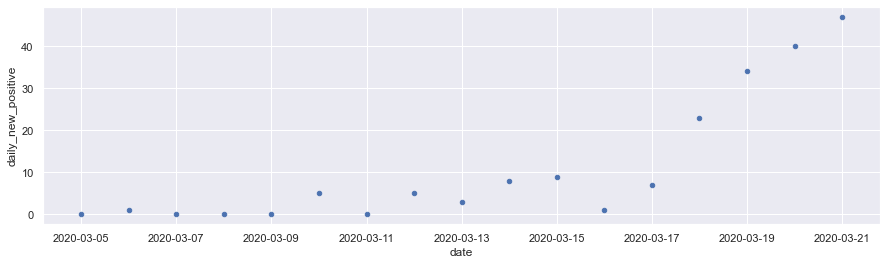

state=OH  last_update=2020-03-20T14:00
doubling every 1.72 days
(naive estimates: current_unresolved=243 hosp=36 icu=9)


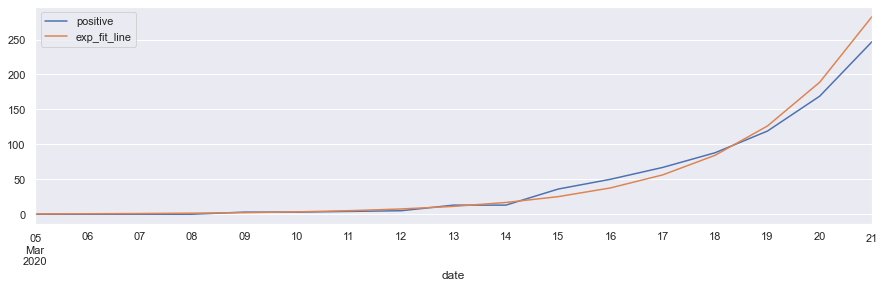

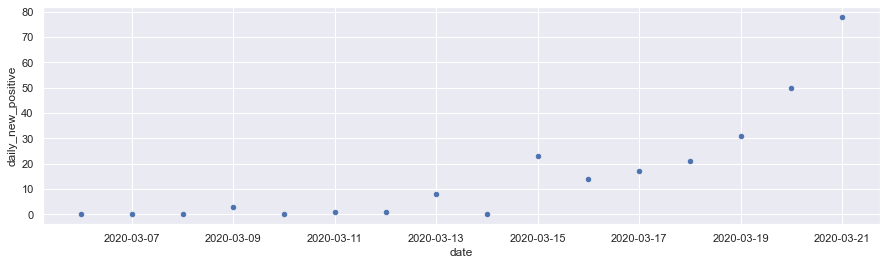

state=MD  last_update=2020-03-22T10:00
doubling every 2.31 days
(naive estimates: current_unresolved=181 hosp=27 icu=7)


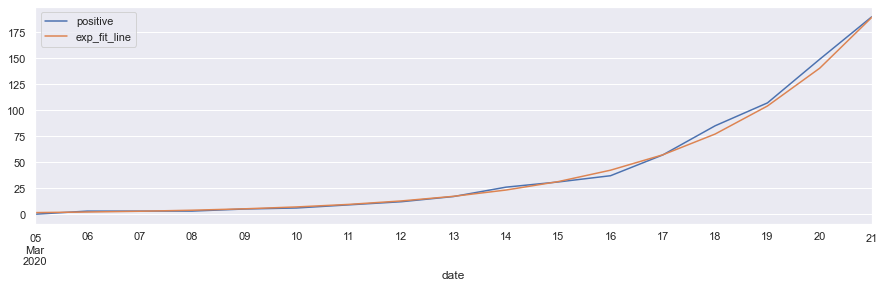

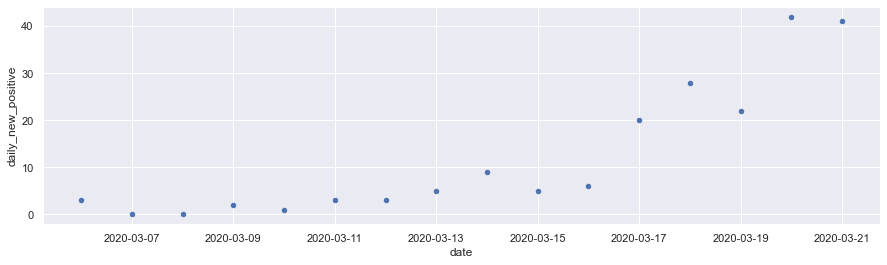

state=CT  last_update=2020-03-21T19:30
doubling every 1.6 days
(naive estimates: current_unresolved=191 hosp=28 icu=7)


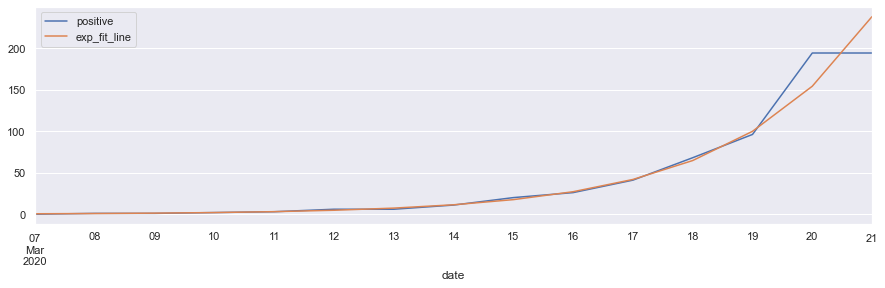

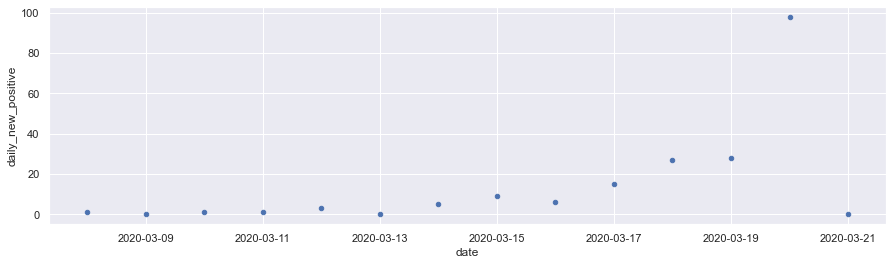

state=VA  last_update=2020-03-21T17:00
doubling every 2.22 days
(naive estimates: current_unresolved=143 hosp=21 icu=5)


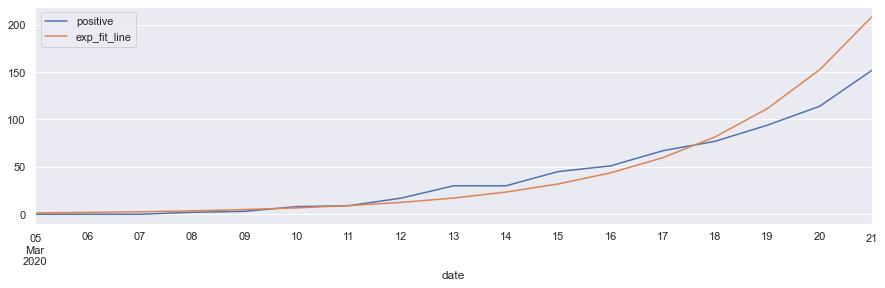

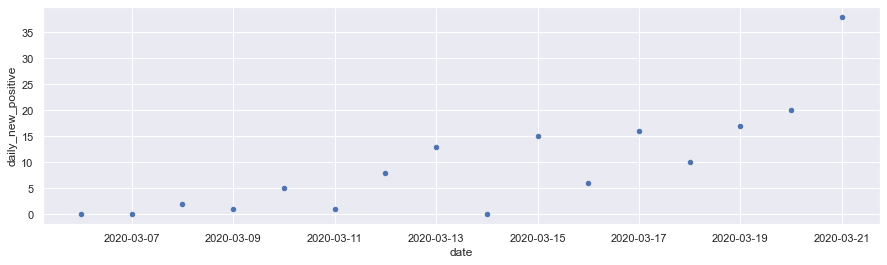

state=MS  last_update=2020-03-22T11:20
doubling every 1.42 days
(naive estimates: current_unresolved=140 hosp=21 icu=5)


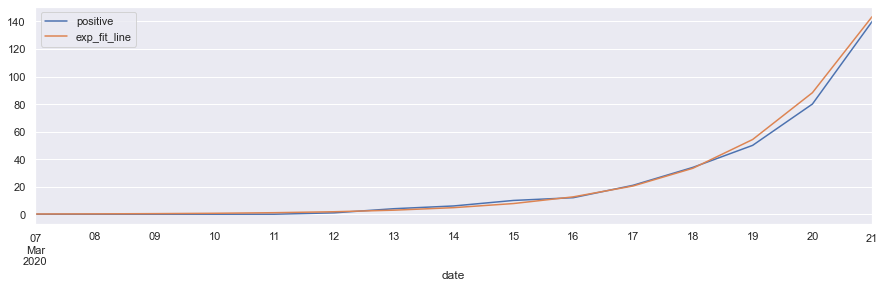

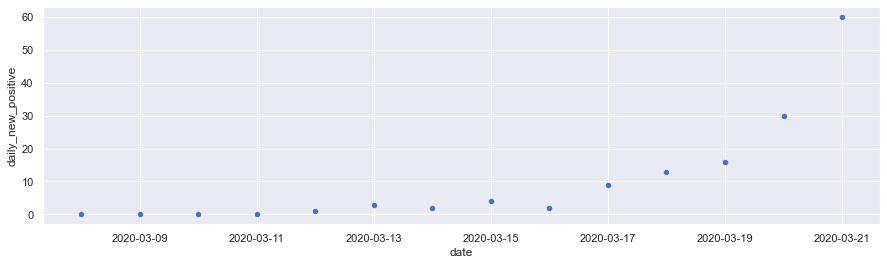

state=IN  last_update=2020-03-13T00:59
doubling every 2.24 days
(naive estimates: current_unresolved=116 hosp=17 icu=4)


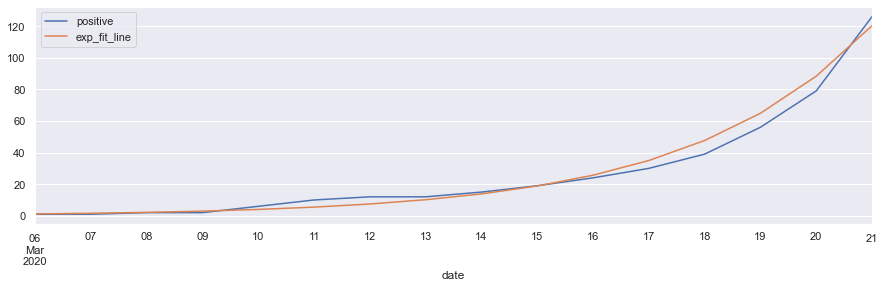

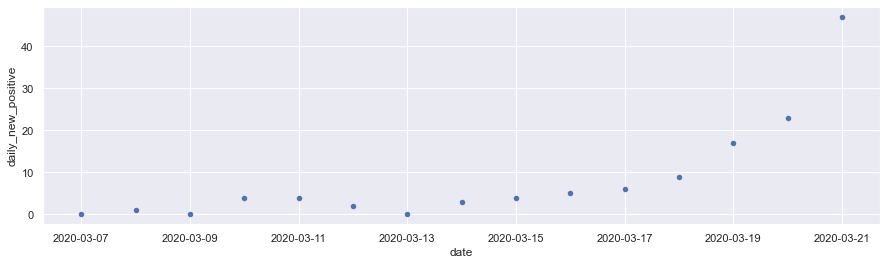

/Users/drskippy/Working/2020covid19/covid_analysis/utility.py:14: RuntimeWarning: divide by zero encountered in log
  log_total_by_day = np.log(non_zero_total_by_day)


state=NV  last_update=2020-03-21T14:00
doubling every nan days
(naive estimates: current_unresolved=119 hosp=17 icu=4)


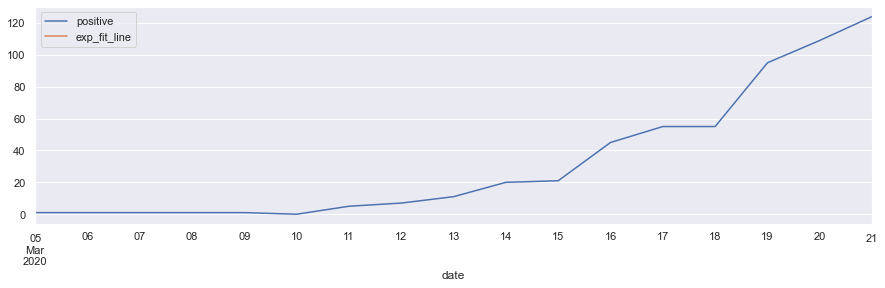

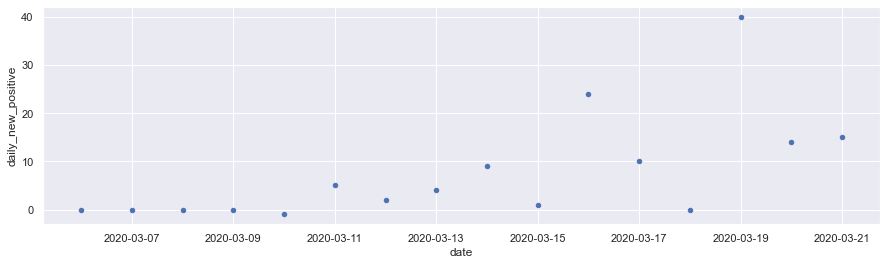

state=SC  last_update=2020-03-21T16:25
doubling every 2.48 days
(naive estimates: current_unresolved=143 hosp=21 icu=5)


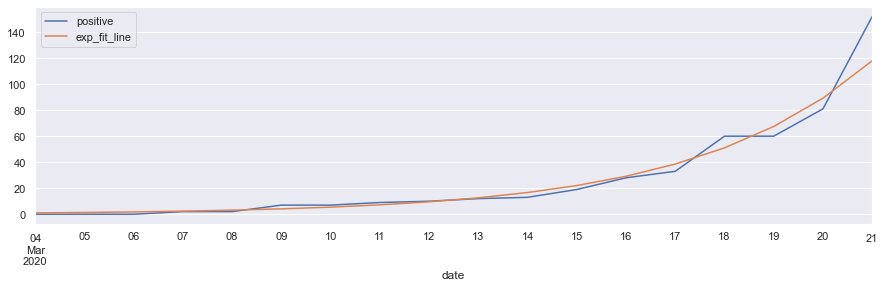

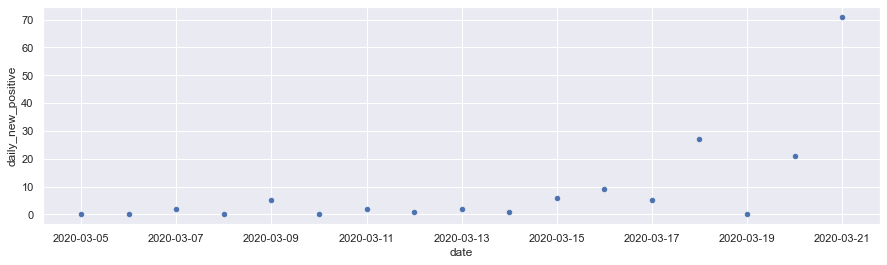

state=MN  last_update=2020-03-21T12:10
doubling every 1.82 days
(naive estimates: current_unresolved=133 hosp=19 icu=5)


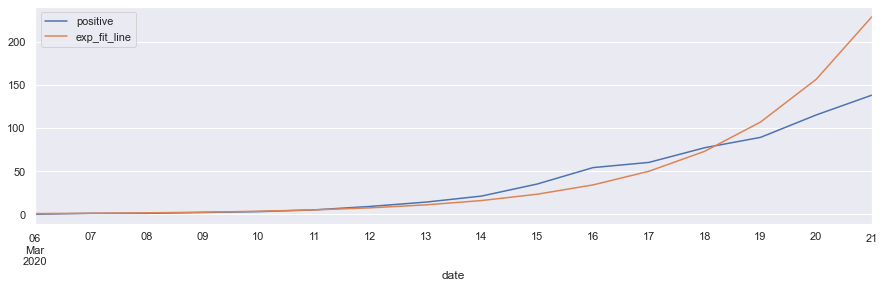

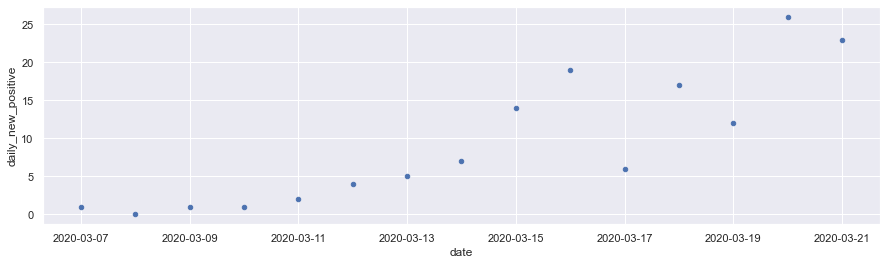

state=AZ  last_update=2020-03-22T00:00
doubling every 3.37 days
(naive estimates: current_unresolved=95 hosp=14 icu=3)


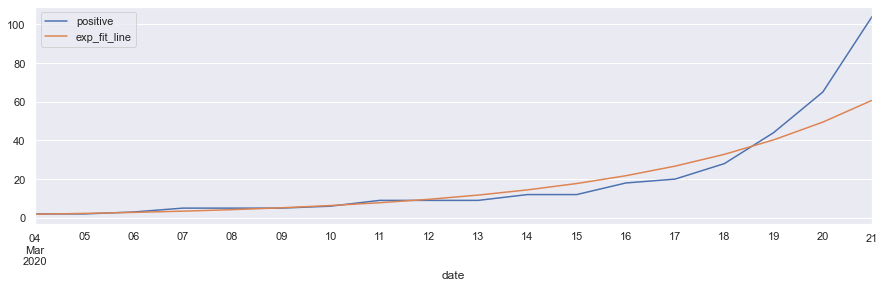

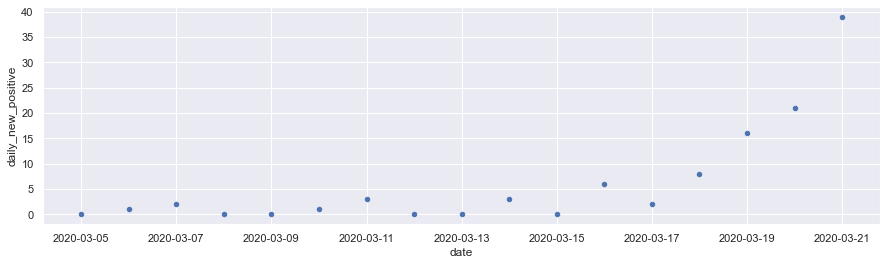

state=OR  last_update=2020-03-21T11:00
doubling every 3.19 days
(naive estimates: current_unresolved=95 hosp=14 icu=3)


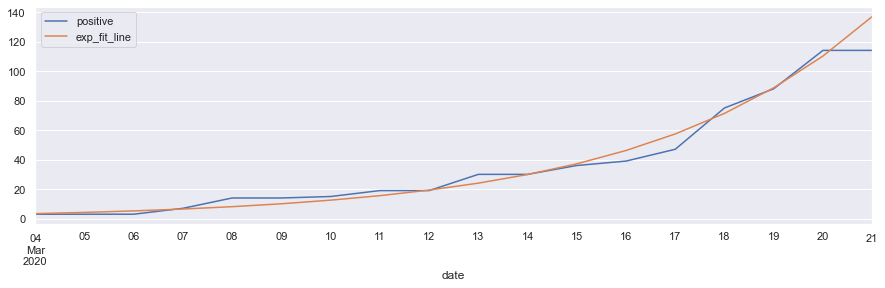

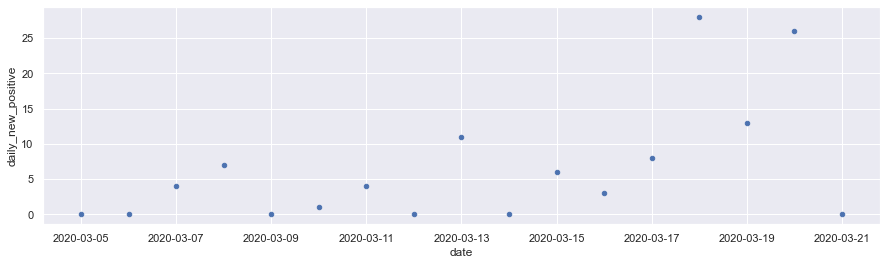

state=AL  last_update=2020-03-22T10:37
doubling every 1.34 days
(naive estimates: current_unresolved=124 hosp=18 icu=4)


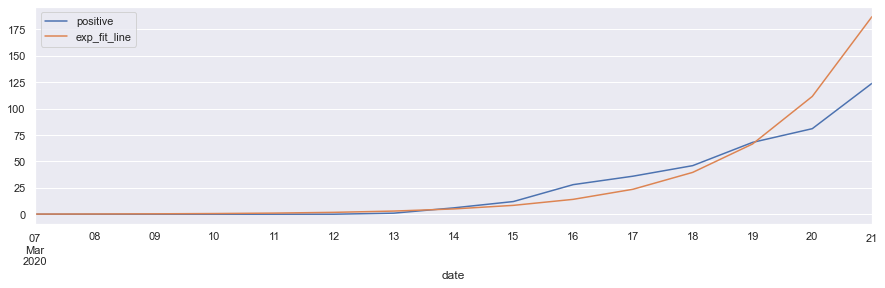

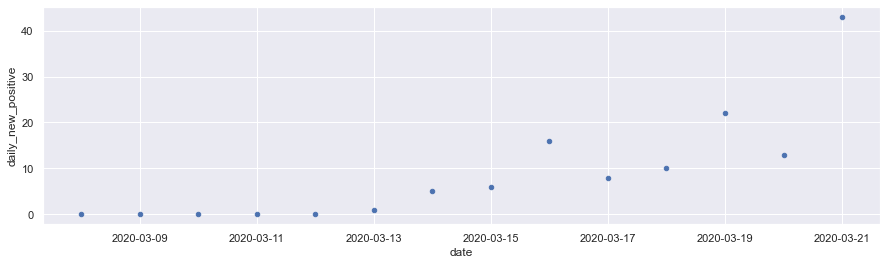

state=UT  last_update=2020-03-21T00:00
doubling every 1.7 days
(naive estimates: current_unresolved=134 hosp=20 icu=5)


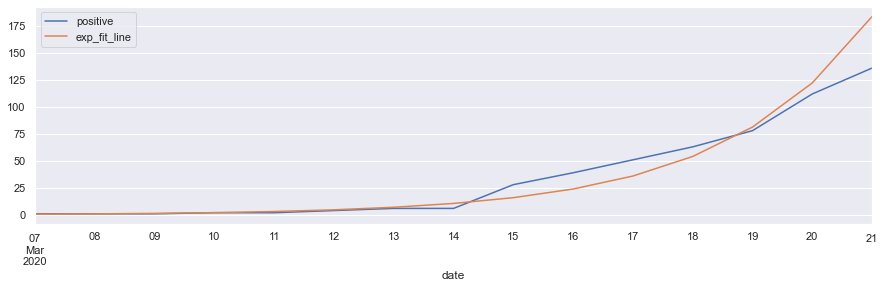

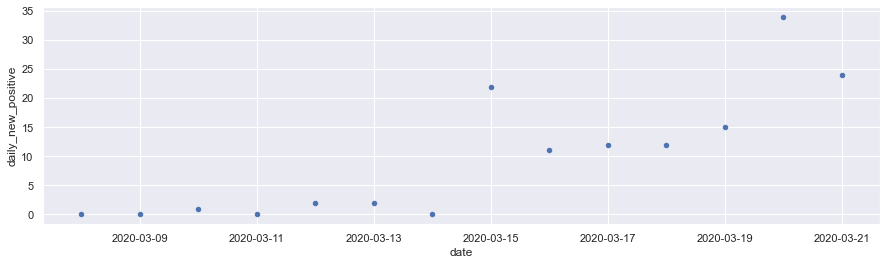

state=AR  last_update=2020-03-21T13:47
doubling every 2.19 days
(naive estimates: current_unresolved=118 hosp=17 icu=4)


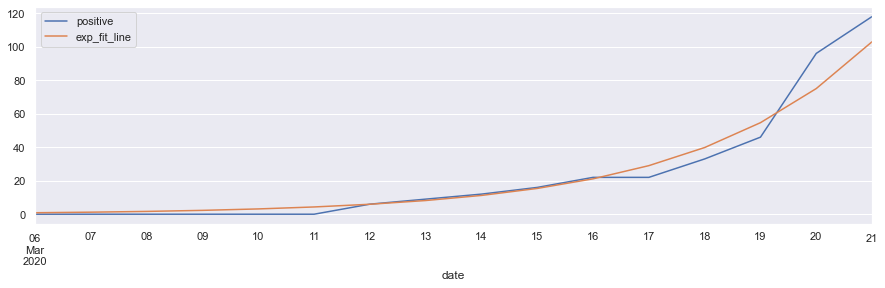

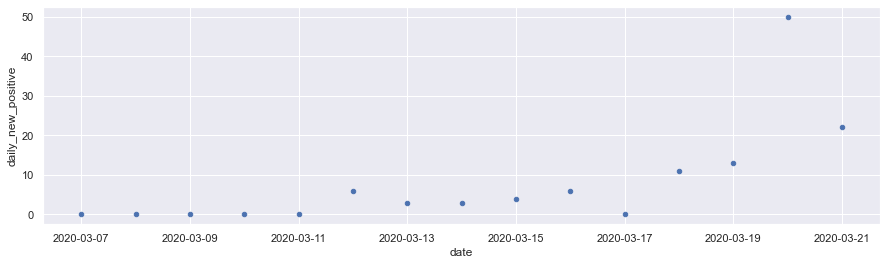

state=KY  last_update=2020-03-22T09:00
doubling every 2.66 days
(naive estimates: current_unresolved=46 hosp=6 icu=1)


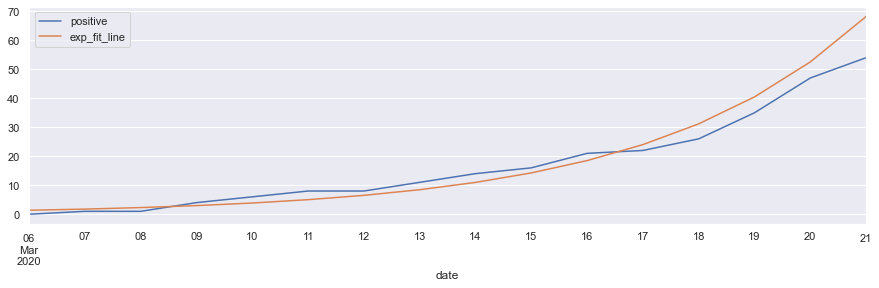

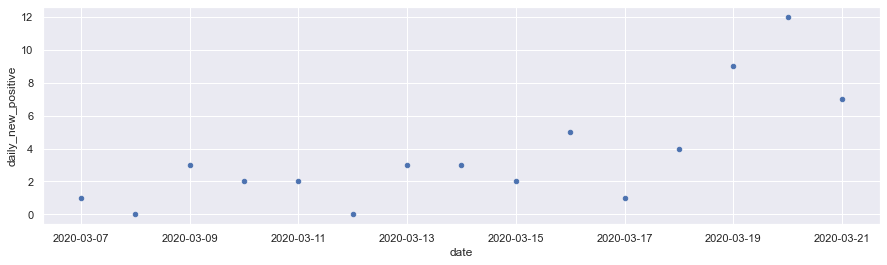

state=DC  last_update=2020-03-21T19:30
doubling every 2.22 days
(naive estimates: current_unresolved=73 hosp=10 icu=2)


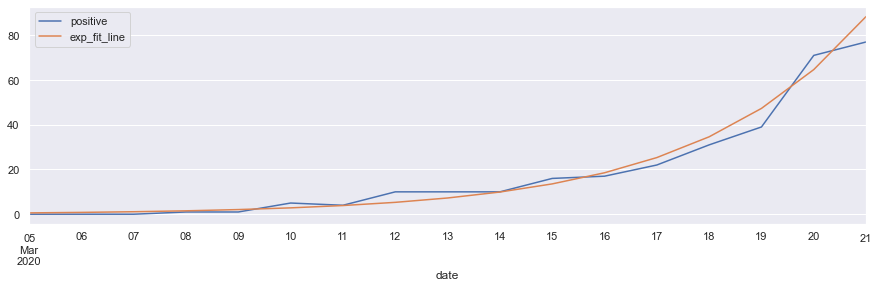

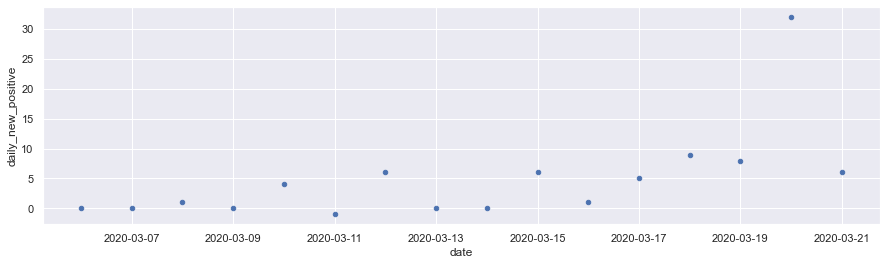

state=MO  last_update=2020-03-21T22:00
doubling every 1.99 days
(naive estimates: current_unresolved=72 hosp=10 icu=2)


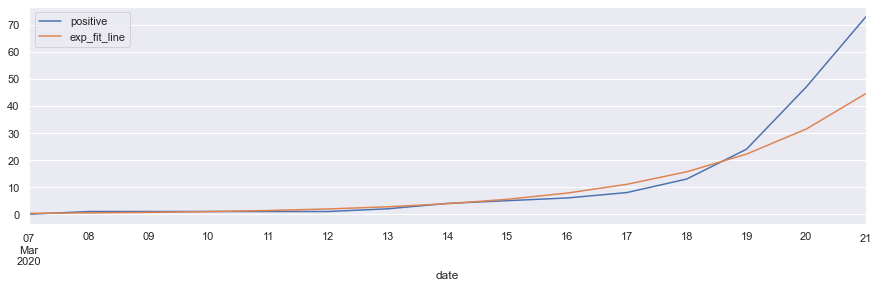

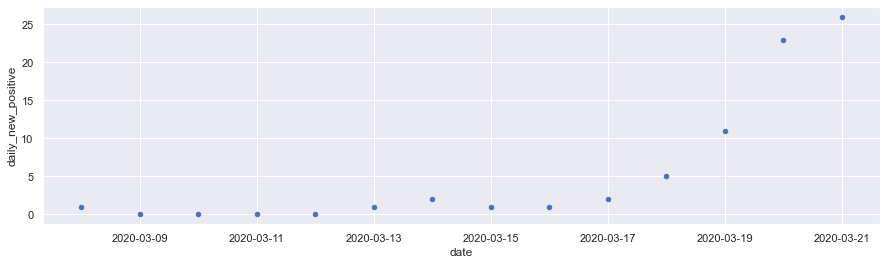

state=IA  last_update=2020-03-22T00:00
doubling every 3.62 days
(naive estimates: current_unresolved=55 hosp=8 icu=2)


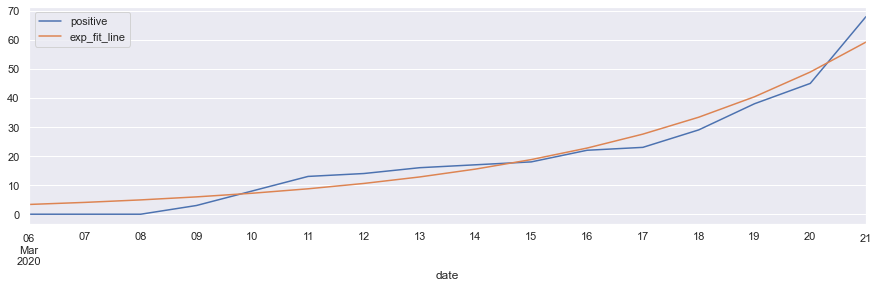

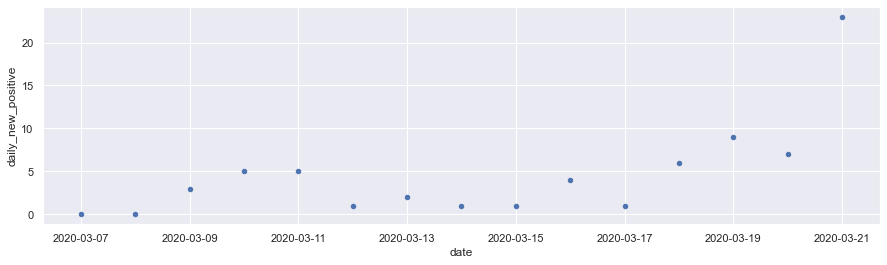

state=ME  last_update=2020-03-22T12:15
doubling every 1.39 days
(naive estimates: current_unresolved=73 hosp=10 icu=2)


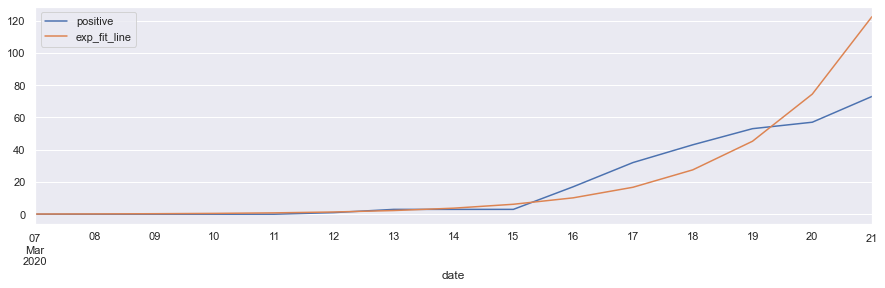

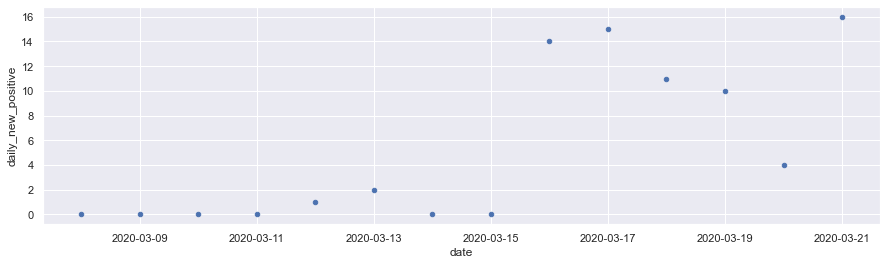

state=OK  last_update=2020-03-22T08:00
doubling every 2.14 days
(naive estimates: current_unresolved=51 hosp=7 icu=2)


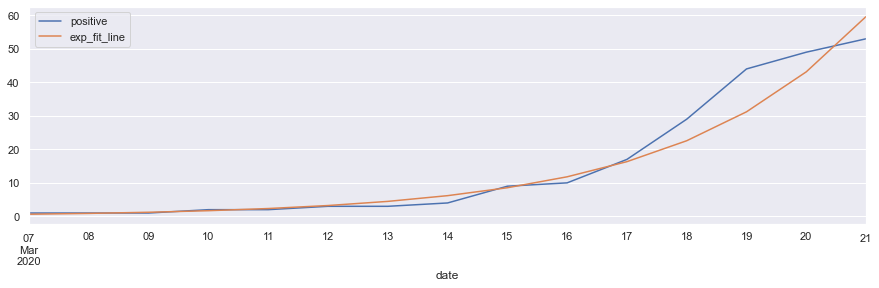

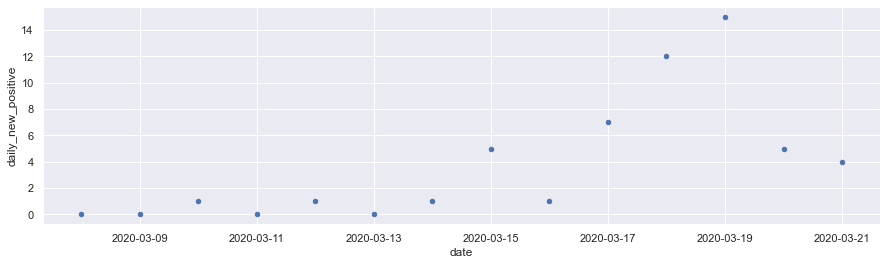

state=RI  last_update=2020-03-21T00:00
doubling every 2.74 days
(naive estimates: current_unresolved=61 hosp=9 icu=2)


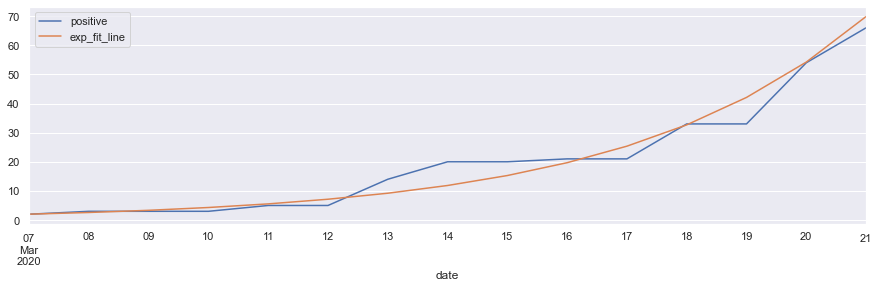

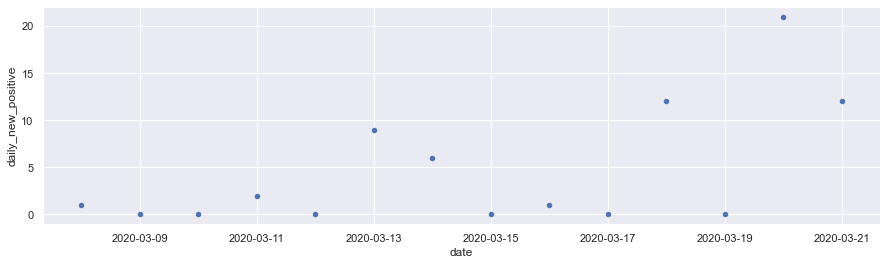

state=NH  last_update=2020-03-21T09:00
doubling every 3.39 days
(naive estimates: current_unresolved=51 hosp=7 icu=2)


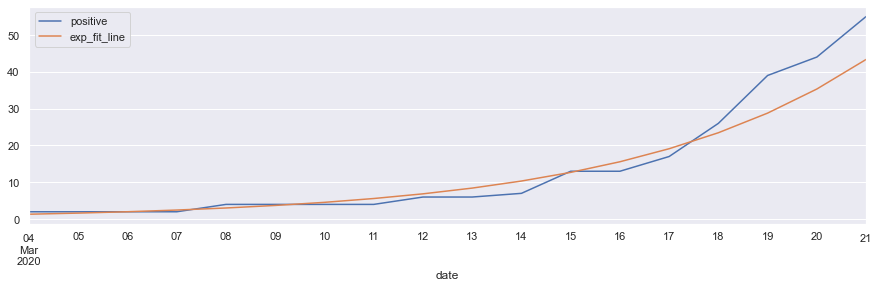

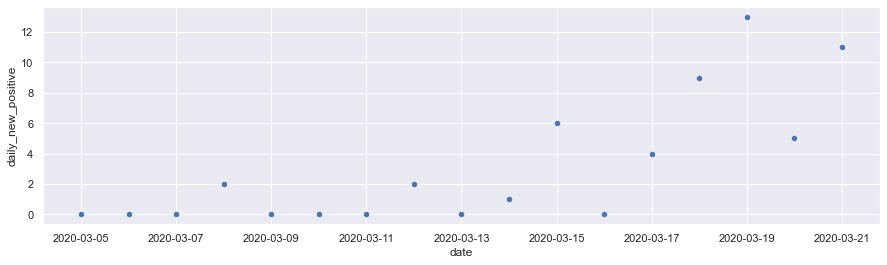

state=NM  last_update=2020-03-21T00:00
doubling every 2.57 days
(naive estimates: current_unresolved=54 hosp=8 icu=2)


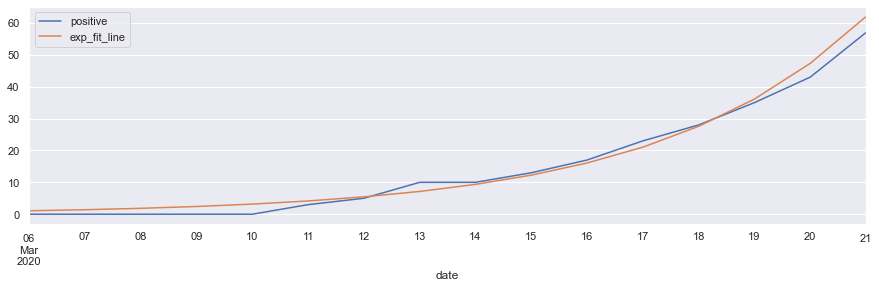

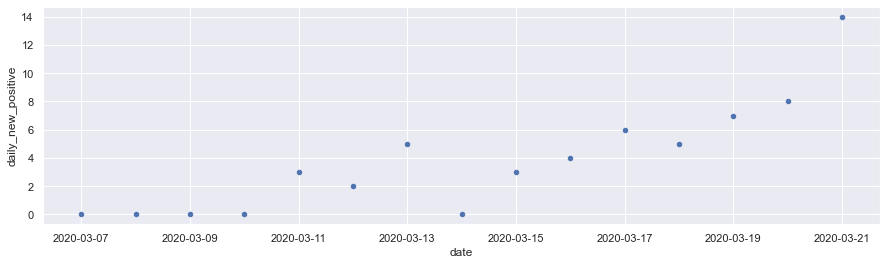

state=KS  last_update=2020-03-21T11:00
doubling every 2.05 days
(naive estimates: current_unresolved=54 hosp=8 icu=2)


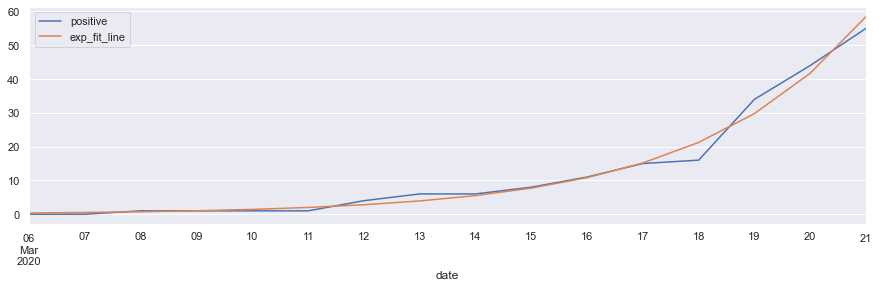

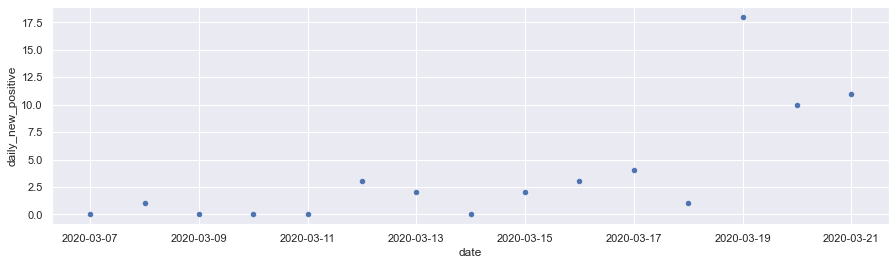

state=VT  last_update=2020-03-20T14:00
doubling every 2.23 days
(naive estimates: current_unresolved=28 hosp=4 icu=1)


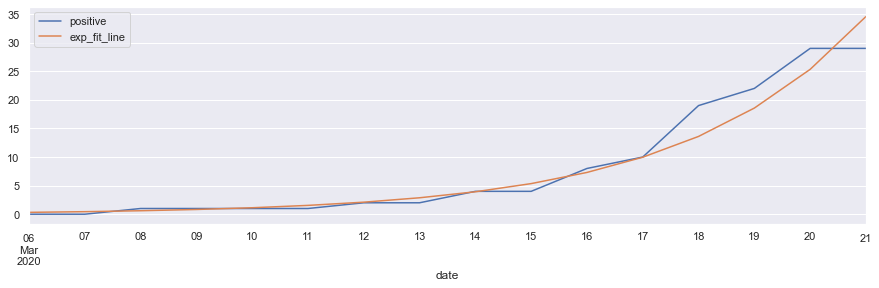

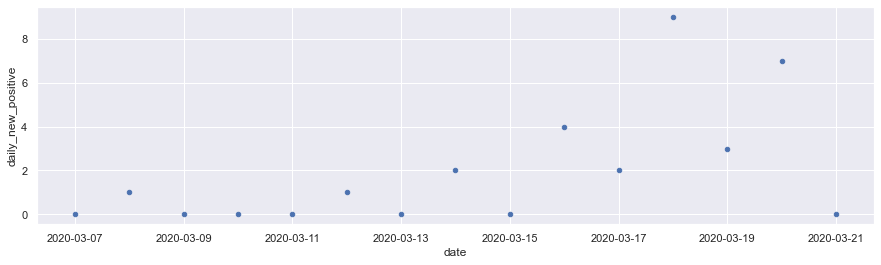

state=HI  last_update=2020-03-21T18:00
doubling every 2.76 days
(naive estimates: current_unresolved=35 hosp=5 icu=1)


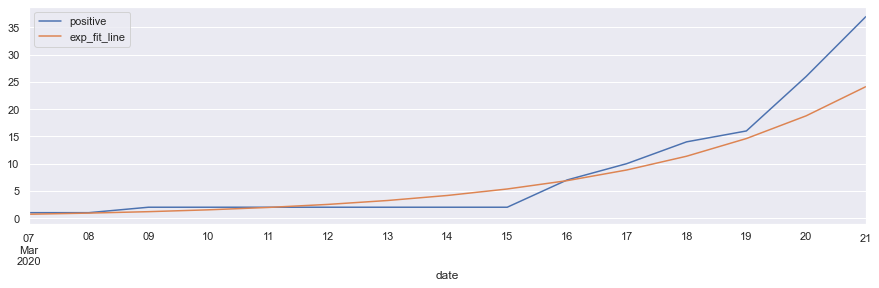

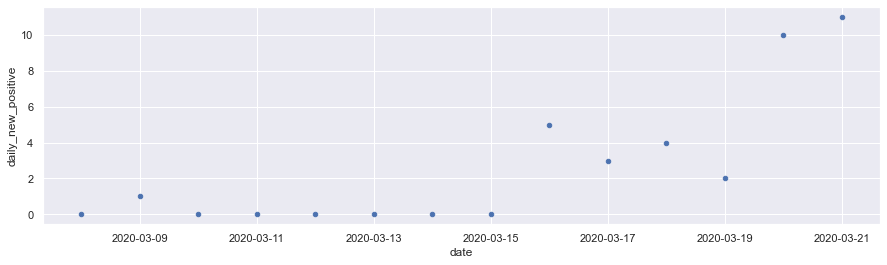

state=NE  last_update=2020-03-21T00:00
doubling every 2.72 days
(naive estimates: current_unresolved=33 hosp=4 icu=1)


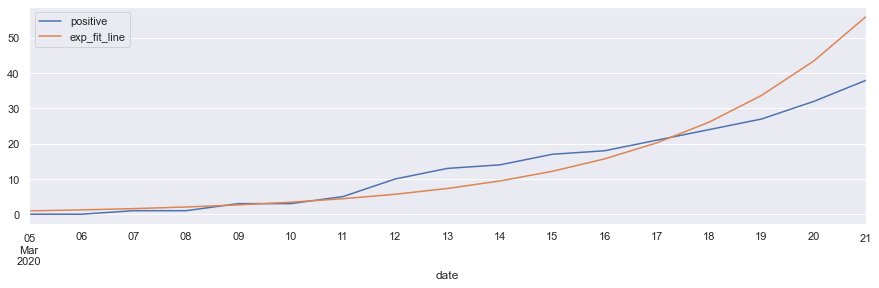

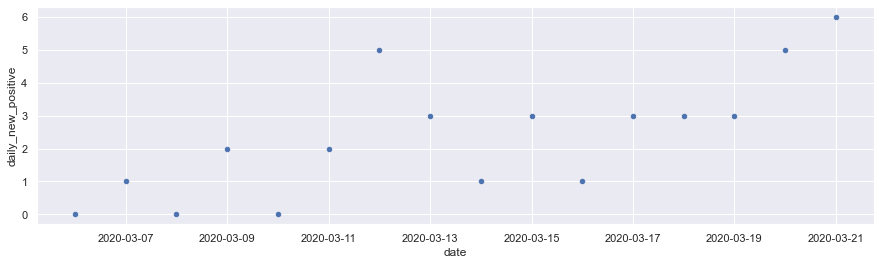

state=DE  last_update=2020-03-22T09:50
doubling every 2.01 days
(naive estimates: current_unresolved=44 hosp=6 icu=1)


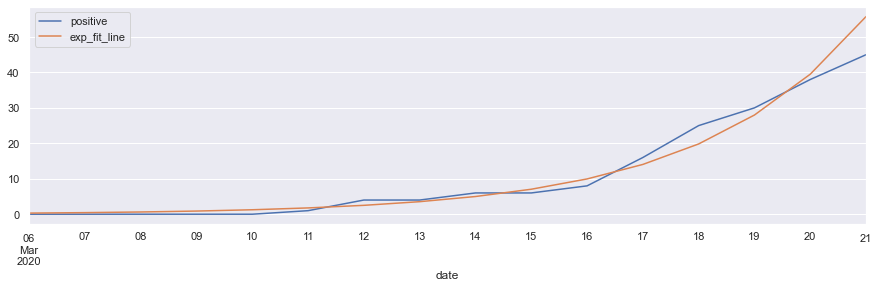

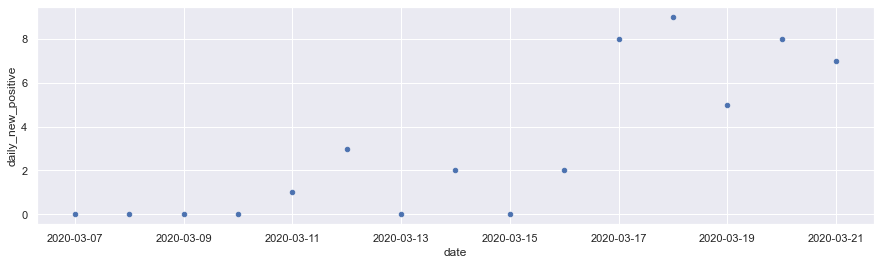

state=ID  last_update=2020-03-21T19:55
doubling every 1.98 days
(naive estimates: current_unresolved=31 hosp=4 icu=1)


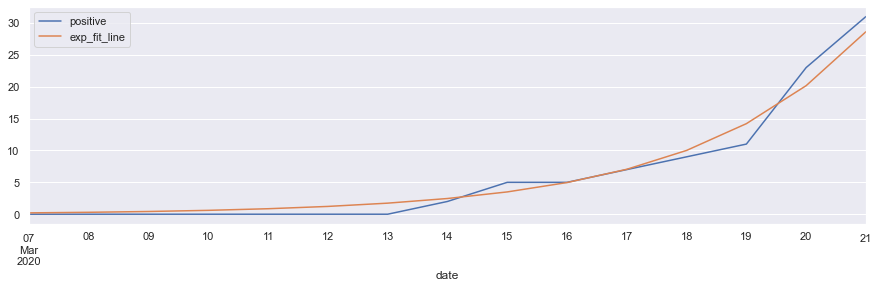

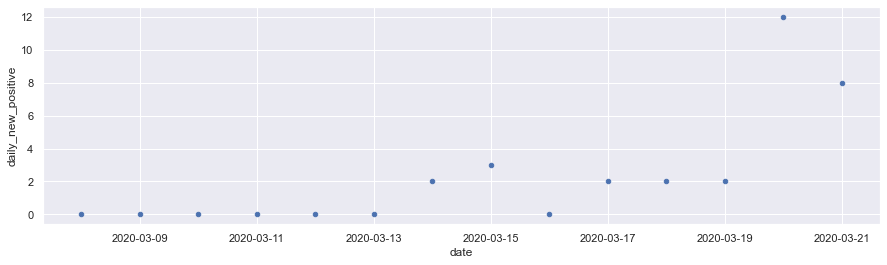

state=MT  last_update=2020-03-22T11:36
doubling every 2.2 days
(naive estimates: current_unresolved=20 hosp=3 icu=0)


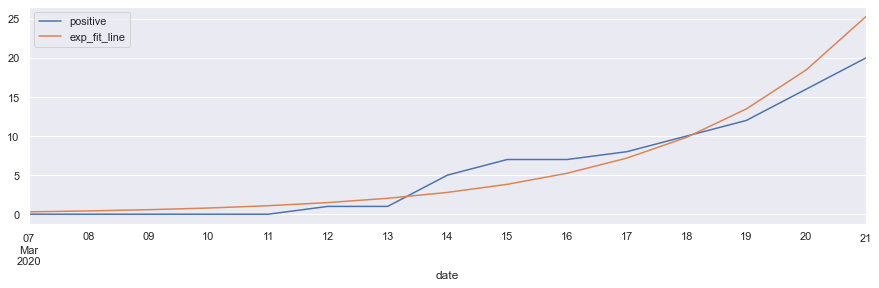

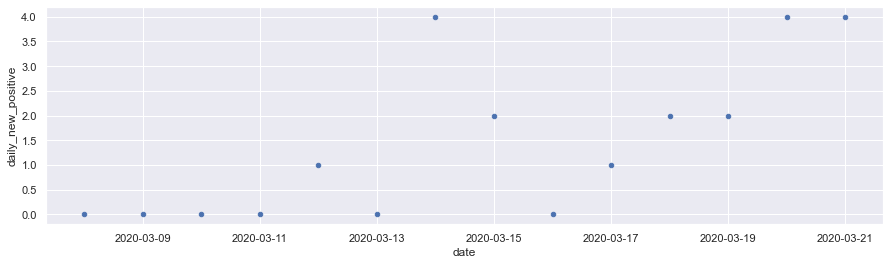

state=ND  last_update=2020-03-22T11:39
doubling every 1.61 days
(naive estimates: current_unresolved=28 hosp=4 icu=1)


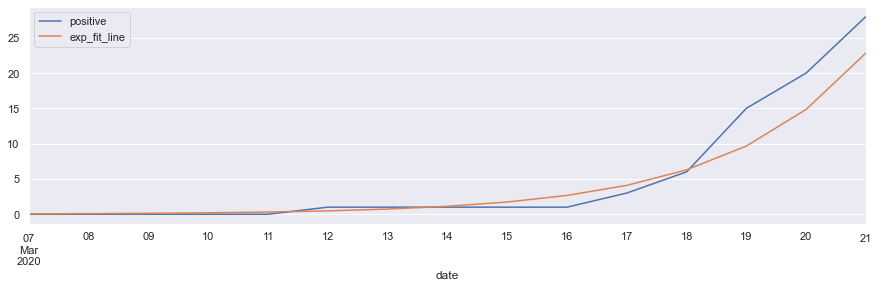

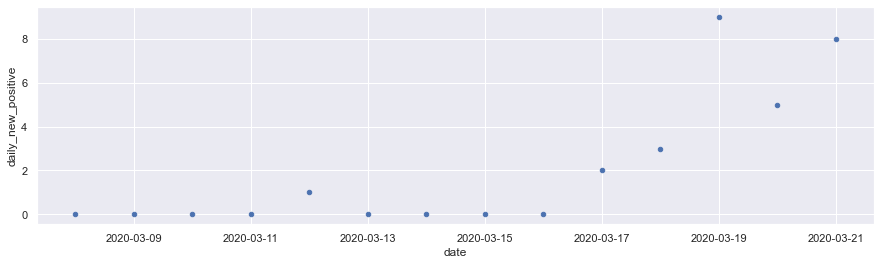

state=GU  last_update=2020-03-22T07:00
doubling every 2.1 days
(naive estimates: current_unresolved=0 hosp=0 icu=0)


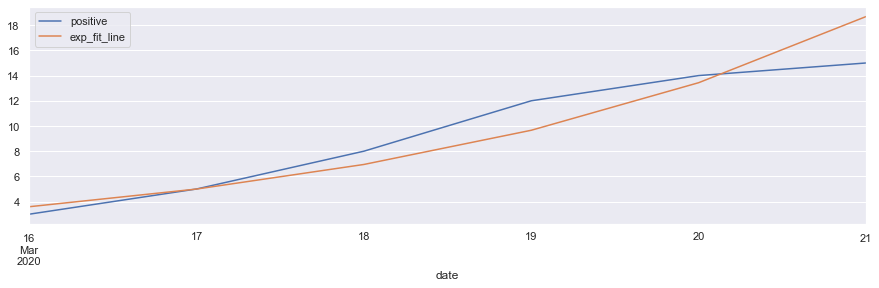

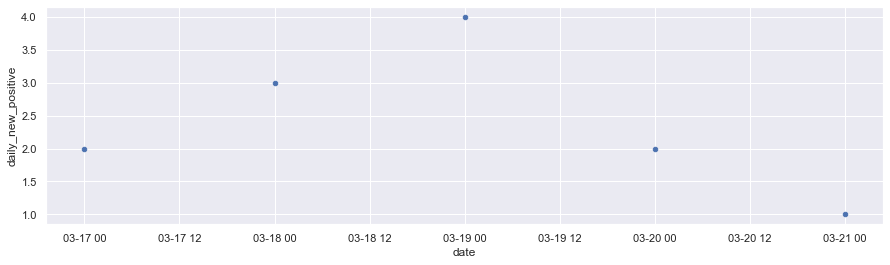

state=WY  last_update=2020-03-21T13:00
doubling every 1.74 days
(naive estimates: current_unresolved=23 hosp=3 icu=0)


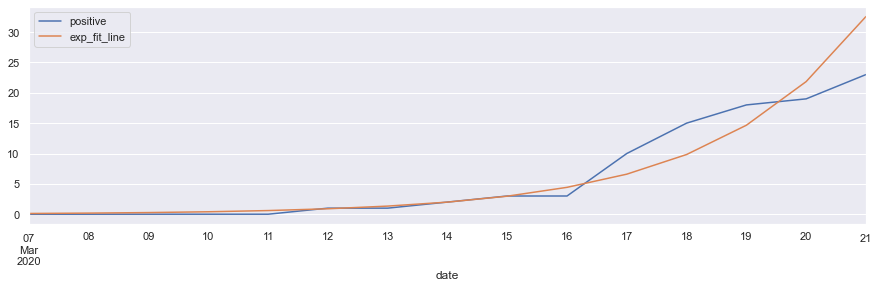

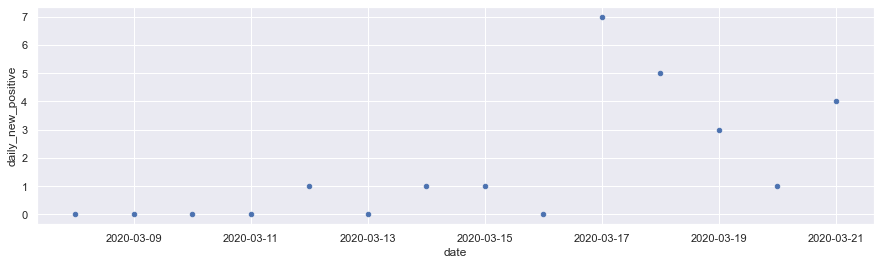

state=PR  last_update=2020-03-22T07:00
doubling every 2.36 days
(naive estimates: current_unresolved=0 hosp=0 icu=0)


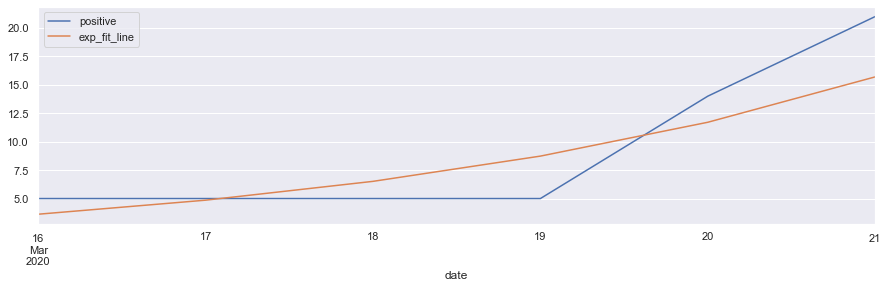

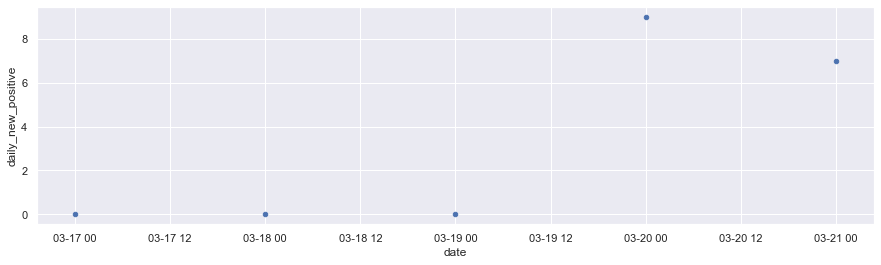

state=SD  last_update=2020-03-22T12:30
doubling every 8.88 days
(naive estimates: current_unresolved=9 hosp=1 icu=0)


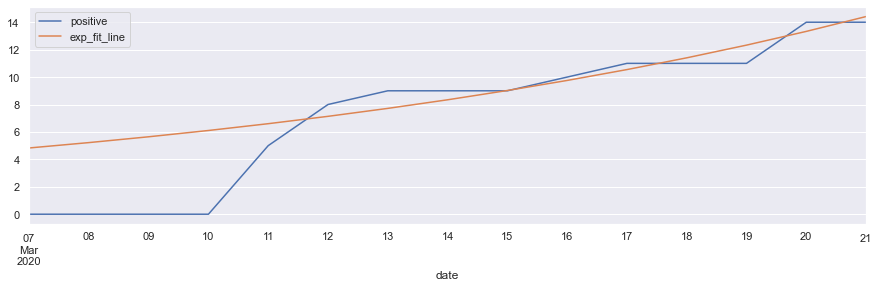

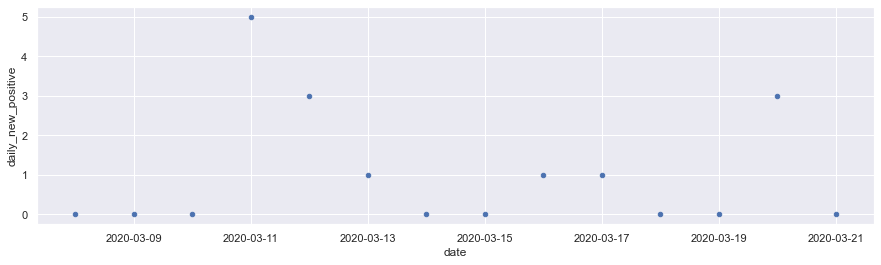

state=AK  last_update=2020-03-21T16:30
doubling every 1.78 days
(naive estimates: current_unresolved=14 hosp=2 icu=0)


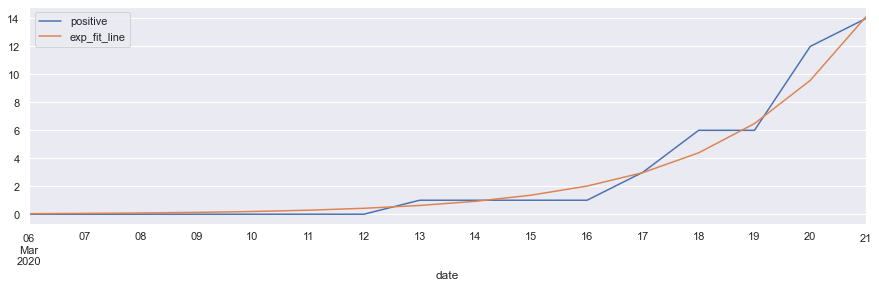

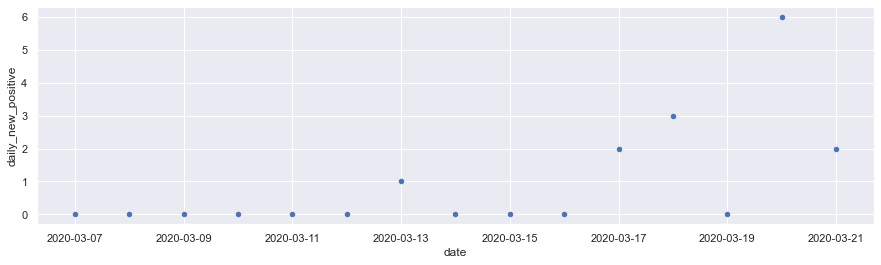

state=WV  last_update=2020-03-21T00:00
doubling every 0.821 days
(naive estimates: current_unresolved=11 hosp=1 icu=0)


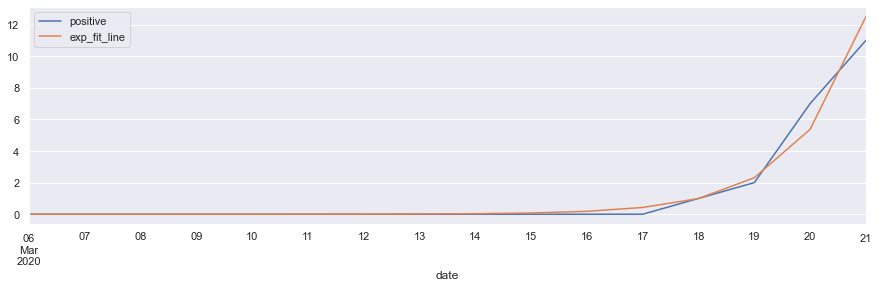

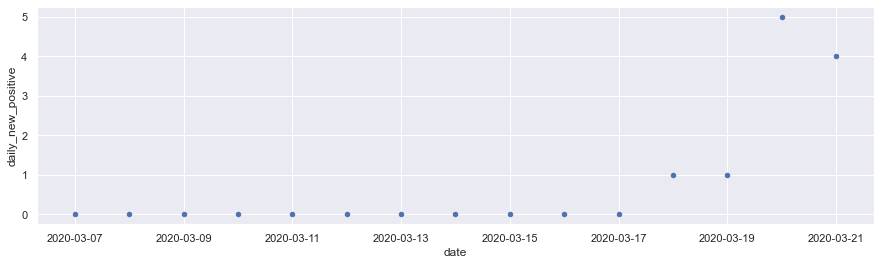

state=VI  last_update=2020-03-21T20:30
doubling every 2.29 days
(naive estimates: current_unresolved=0 hosp=0 icu=0)


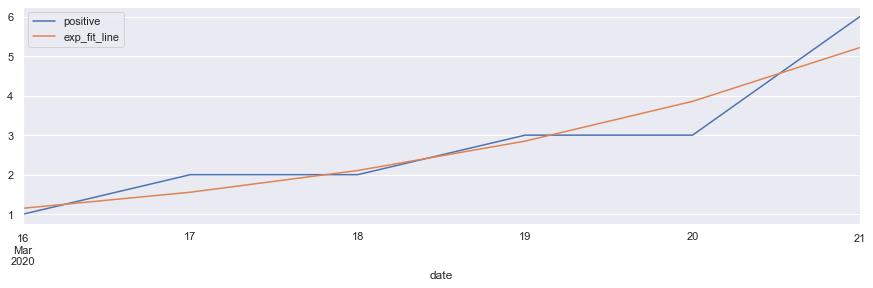

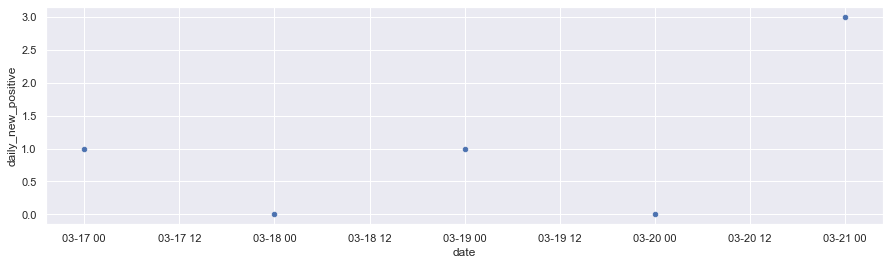

state=MP  last_update=2020-03-22T01:30
doubling every 6.93e-11 days
(naive estimates: current_unresolved=0 hosp=0 icu=0)


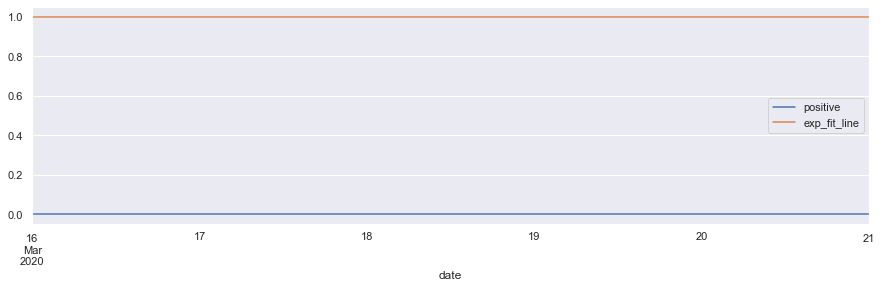

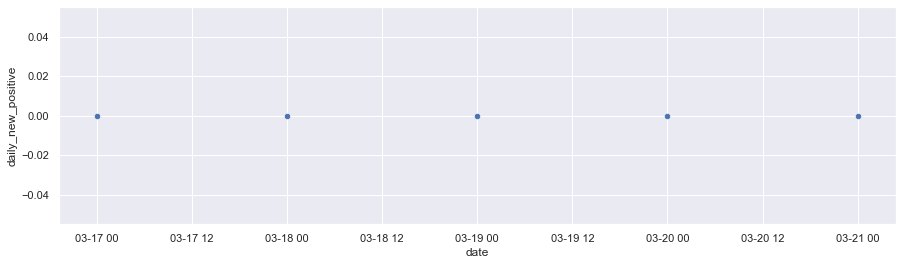

state=AS  last_update=2020-03-19T00:00
doubling every nan days
(naive estimates: current_unresolved=0 hosp=0 icu=0)


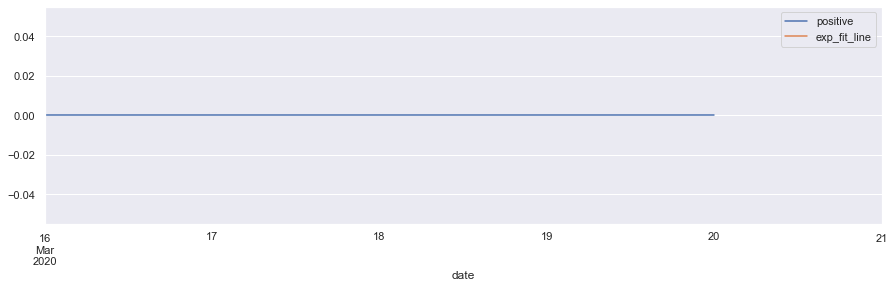

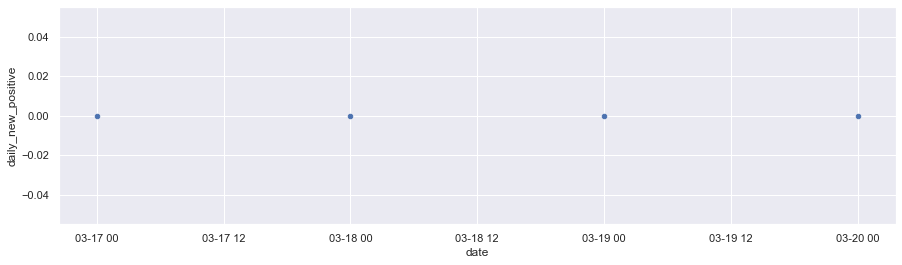

In [6]:
for s in states_in_order:
    dfq, dt, lud = get_state_doubling_df(df, s)
    cn, cnh, cni = current_cases(dfq.daily_new_positive.values)
    lu = str(lud)[:16]
    print("state={}  last_update={}\ndoubling every {:.3} days\n(naive estimates: current_unresolved={} hosp={} icu={})".format(
        s, lu, dt, cn, cnh, cni))
    dfq.plot(x="date", y=["positive", "exp_fit_line"], figsize=[15,4])
    if len(dfq) > 1:
        dfq.plot.scatter(x="date", y="daily_new_positive", figsize=[15,4])
    plt.show()

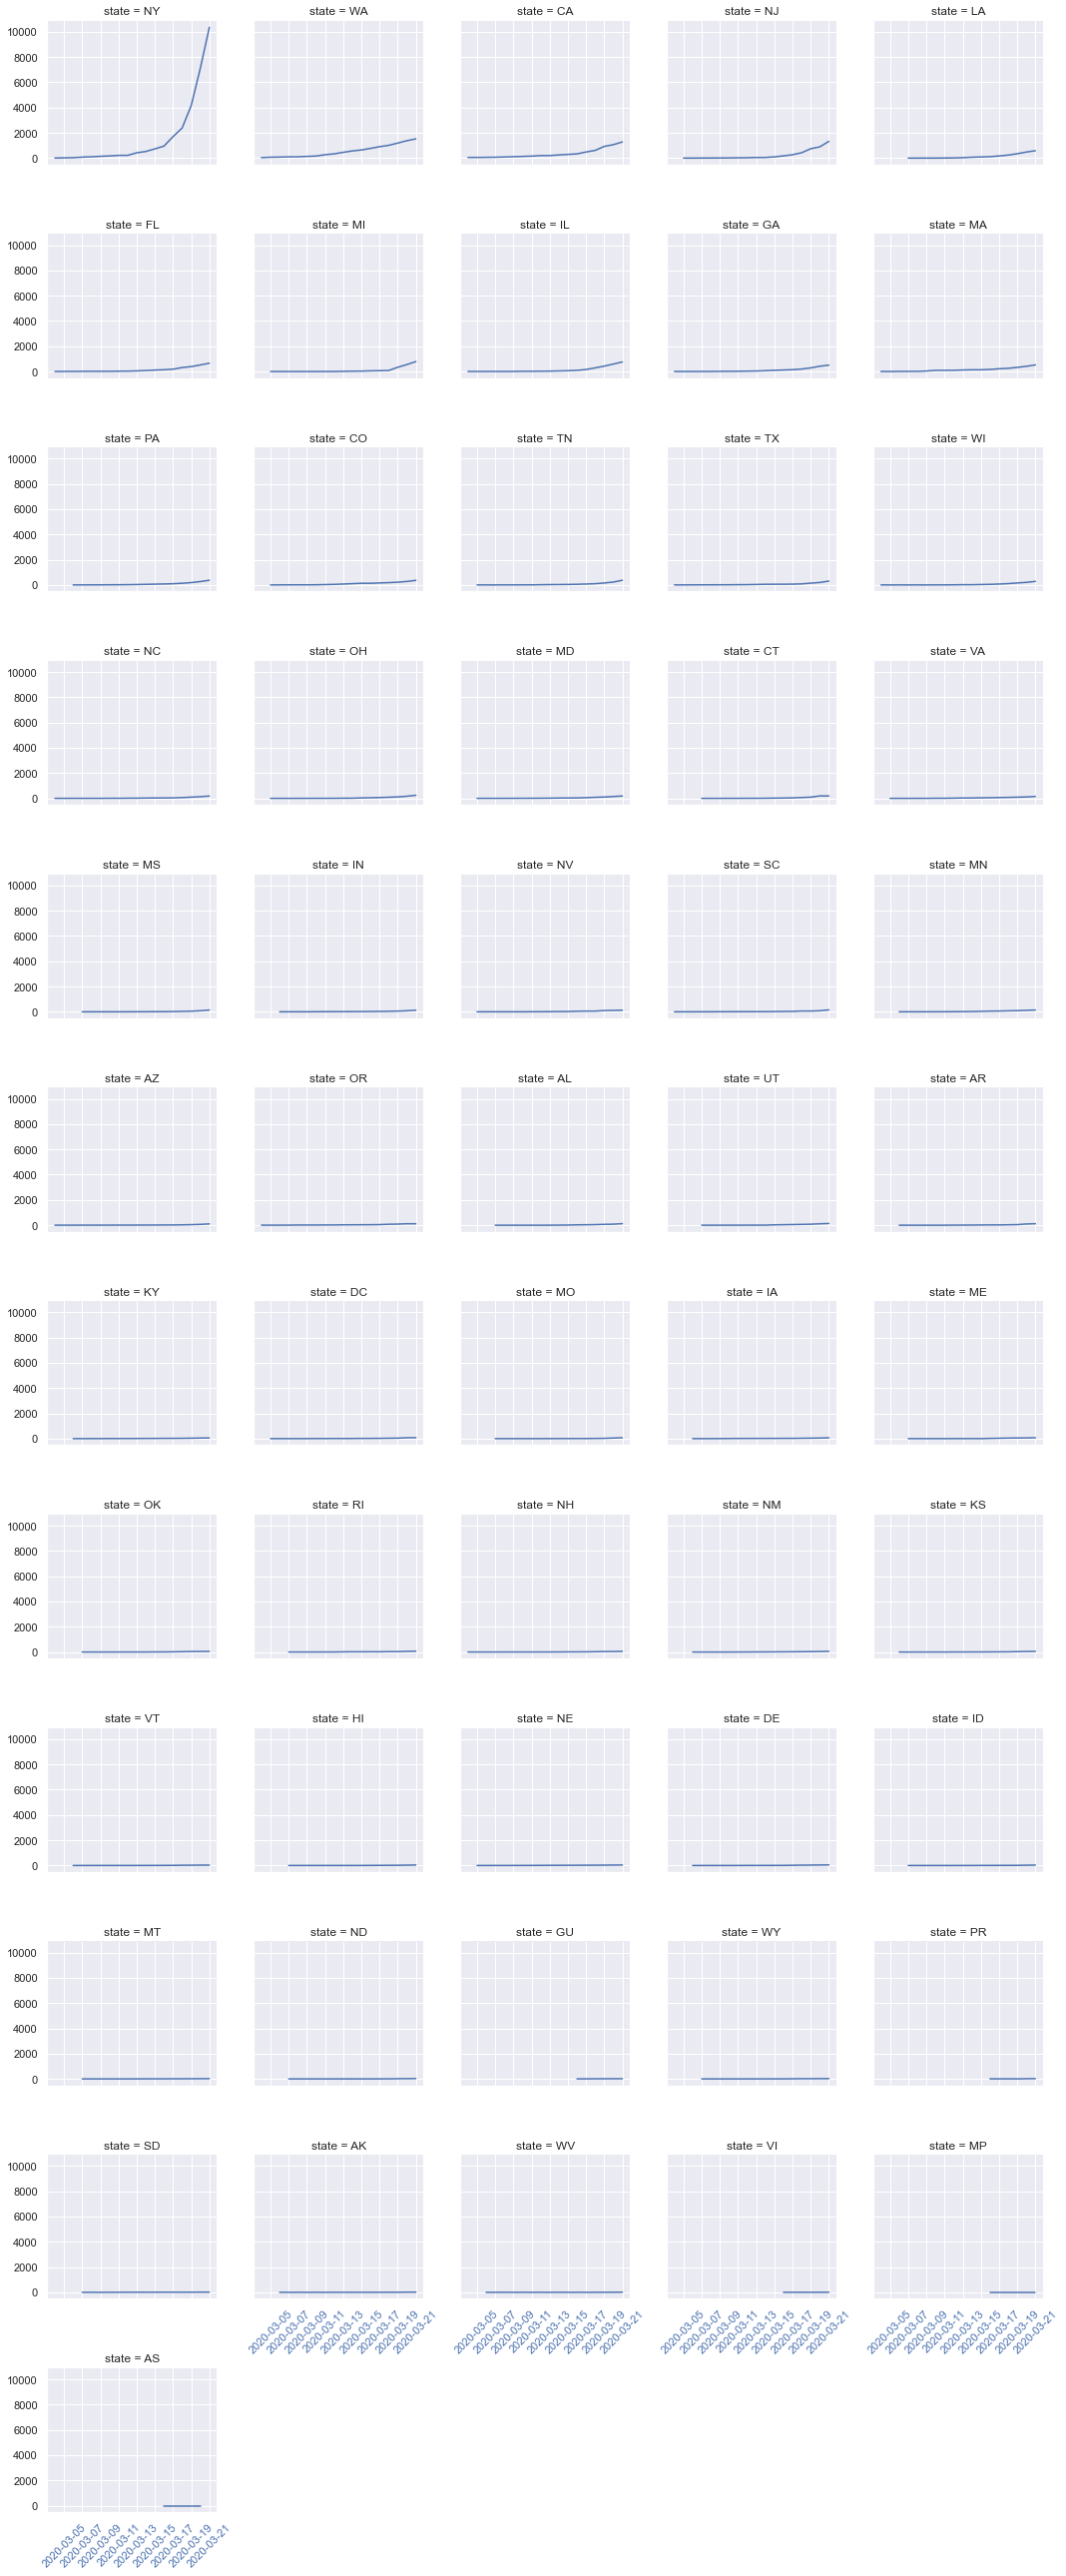

In [7]:
g = sns.FacetGrid(df, col="state", col_wrap=5, height=3, margin_titles=True)
g.map(plt.plot,"date","positive",color="b")
g.map(plt.xticks, rotation=45)